# Data Visualisation Project

# The Seasonal Symphony of Birds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

The dataset 'datasetbirds' used *contains* information related to bird density observations over time. It consists of several columns, and here's what each column represents:

*   S.No: This column is likely an identifier for each data point,
*   Latitude: This column contains latitude coordinates in the format of degrees, minutes, and direction (N for North).
* Longitude: This column contains longitude coordinates in the format of degrees, minutes, and direction (E for East).
* Month: The month when the bird density observations were recorded.
* Year: The year when the bird density observations were recorded.
* Bird Density: The number of birds observed or counted during the given month and year. It appears to be the main numerical variable of interest in the dataset.

Perform exploratory data analysis to look at summary statistics, distributions, trends, and correlations between variables. You can also create various visualizations to help identify patterns and relationships in the data.

In [2]:
# Load the dataset
df = pd.read_excel("datasetbirds.xlsx")

# Exploration of the dataset
print(df.head())  # Display the first few rows to check the data

summary_stats = df.describe()
print(summary_stats)


   S.No    Latitude    Longitude   Month  Year  Bird Density
0     1  29.1451° N  116.1832° E     May  2008          3750
1     2  29.1451° N  116.1832° E     May  2012          1975
2     3  45.9391° N  123.6241° E     May  2012          1425
3     4  70.1890° N  141.9770° E    July  2009           160
4     5  70.1890° N  141.9770° E  August  2009           160
            S.No         Year  Bird Density
count  58.000000    58.000000     58.000000
mean   29.500000  2003.948276   2475.810345
std    16.886879     6.952022   1382.754135
min     1.000000  1981.000000    100.000000
25%    15.250000  2003.000000   1102.750000
50%    29.500000  2005.500000   2880.000000
75%    43.750000  2008.000000   3806.000000
max    58.000000  2012.000000   4101.000000


# Histogram and kernel density estimate (KDE) plot
The blue curve in the plot shows an estimated representation of the probability density of bird density values in your dataset. It helps you understand how the bird density values are distributed and whether there are any modes or peaks in the distribution.

In this specific KDE plot, if we observe peaks or modes in the 'Bird Density' distribution, it suggests that there are specific bird density levels that are more common or frequent in your dataset. These modes or peaks can be significant for understanding patterns and trends in bird density data.

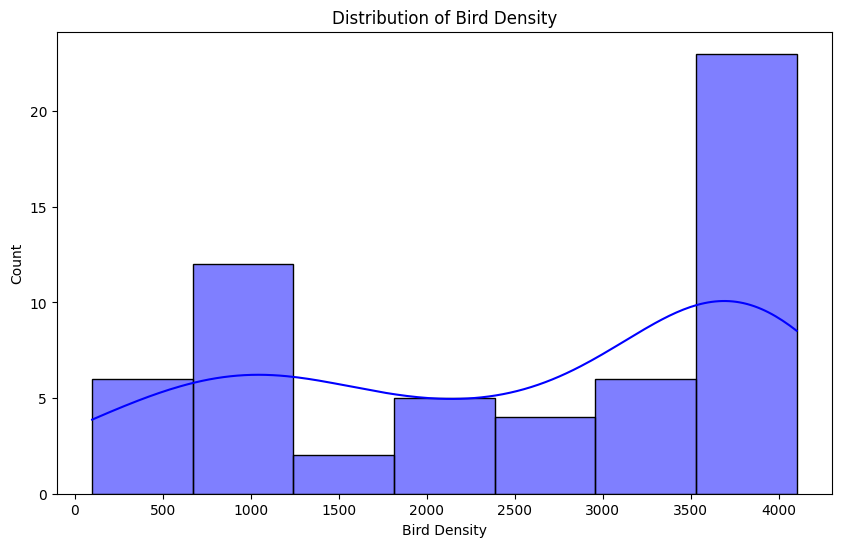

In [7]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Bird Density'], kde=True, color='blue')
plt.title('Distribution of Bird Density')
plt.xlabel('Bird Density')
plt.show()


# Count of records by month

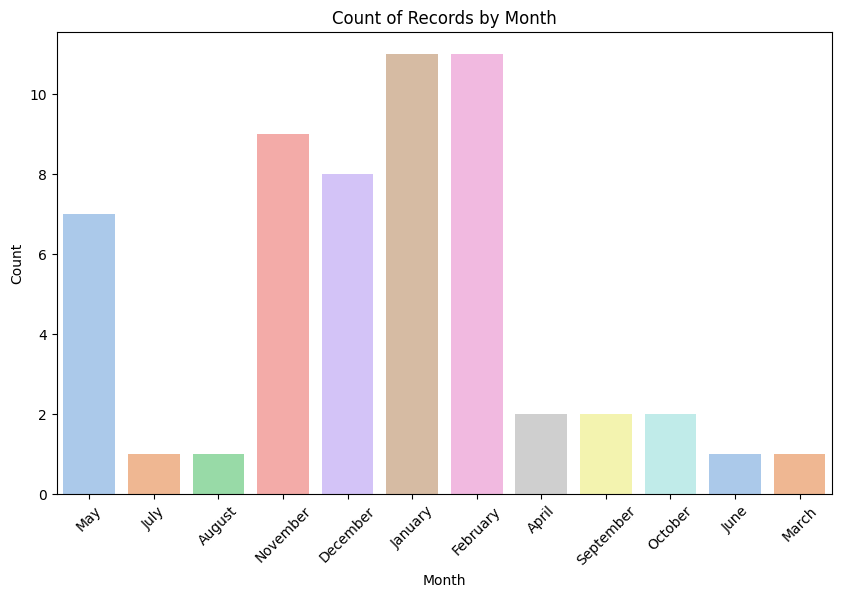

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='pastel')
plt.title('Count of Records by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Bird Density by Month (Bar Chart)
examine the total bird density recorded for each month, revealing any seasonal patterns or trends in bird density.

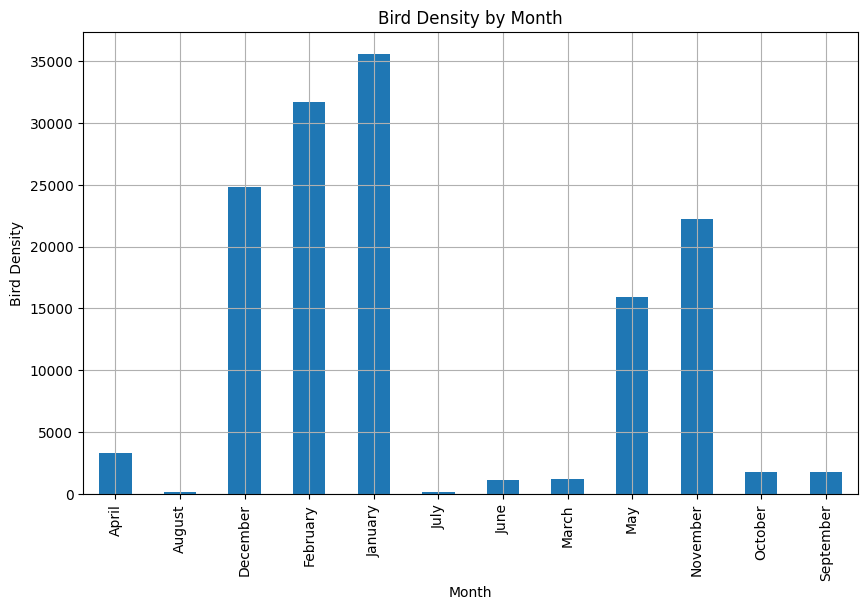

In [ ]:
# Bar chart for Bird Density by Month
plt.figure(figsize=(10, 6))
df.groupby('Month')['Bird Density'].sum().plot(kind='bar')
plt.title('Bird Density by Month')
plt.xlabel('Month')
plt.ylabel('Bird Density')
plt.grid()
plt.show()

# Distribution of Bird Observations (Scatter Plot)
 The color of points indicates the bird density at specific locations, while the coordinates (latitude and longitude) show where the observations were made.

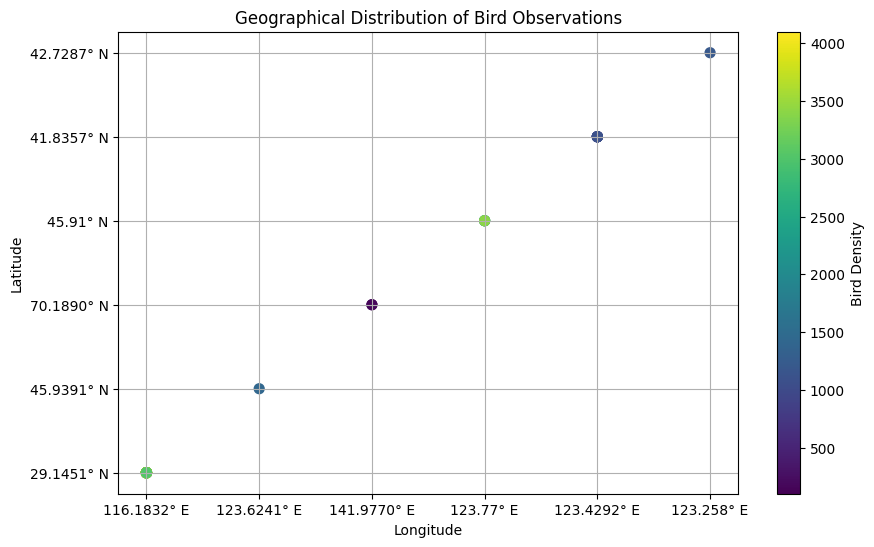

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Bird Density'], cmap='viridis', s=50)
plt.title('Geographical Distribution of Bird Observations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Bird Density')
plt.grid()
plt.show()


# Distribution of Bird Density (Histogram)
helps in understanding how bird density values are distributed, whether they are concentrated around specific values or scattered across a wide range.

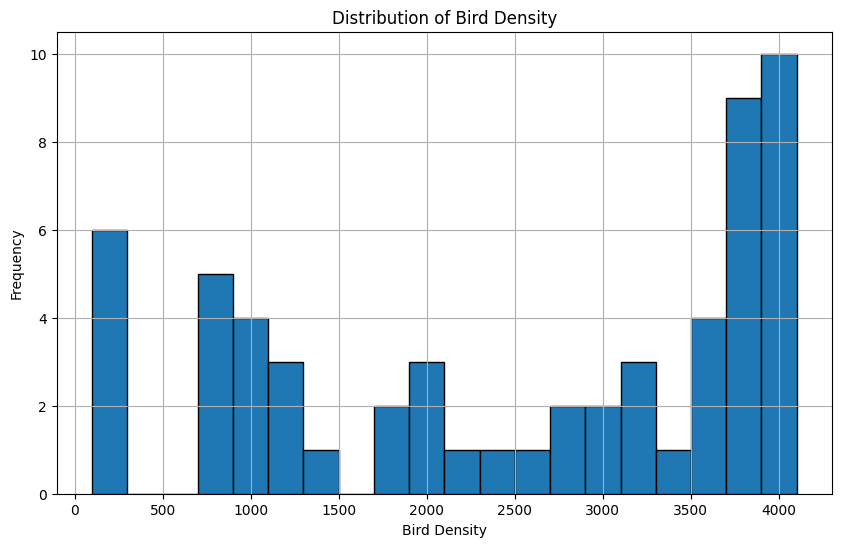

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Bird Density'], bins=20, edgecolor='k')
plt.title('Distribution of Bird Density')
plt.xlabel('Bird Density')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# Bird Density by Month (Boxplot)
provides a summary of the central tendency and spread of bird density for each month. You can identify seasonal variations or potential outliers in bird density.

{    Box:
        The box in the middle represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3).
        The line inside the box represents the median (Q2), which is the middle value when the data is sorted.
        The width of the box is not significant, but the length of the box indicates the spread of the middle 50% of the data.

  Whiskers:
        The lines extending from the box (whiskers) show the range of the data.
        The lower whisker extends to the minimum data point within 1.5 times the IQR from Q1. Any data point below this range is considered an outlier.
        The upper whisker extends to the maximum data point within 1.5 times the IQR from Q3. Outliers beyond this range are shown as individual points.

  Outliers:
        Individual data points that fall outside the whiskers are shown as individual points or dots. They are potential outliers, i.e., data points that are significantly different from the rest of the data.
}

<Figure size 1000x600 with 0 Axes>

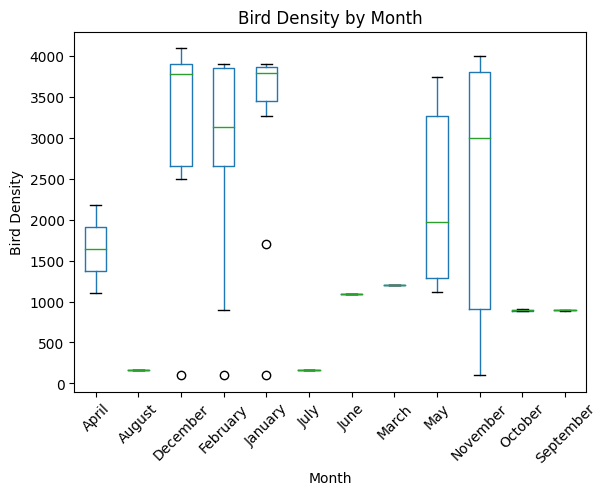

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Bird Density', by='Month', grid=False, rot=45)
plt.title('Bird Density by Month')
plt.ylabel('Bird Density')
plt.xlabel('Month')
plt.suptitle('')
plt.show()


# Bird Density over time (Line Chart)
Shows how bird density changes over time for different geographic locations, with each location represented by a different colored line. It allows us to compare the trends and variations in bird density across these locations.

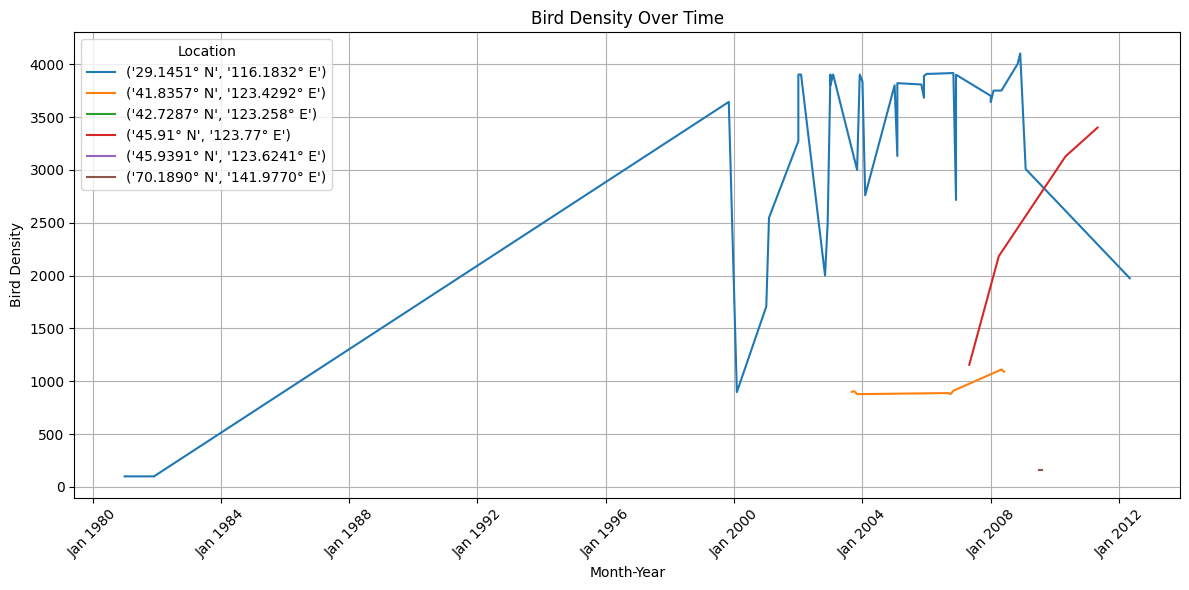

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import TABLEAU_COLORS

# Group the data by latitude and longitude
grouped = df.groupby(['Latitude', 'Longitude'])

# Set up a list of unique colors for lines
unique_colors = list(TABLEAU_COLORS.values())

plt.figure(figsize=(12, 6))

for i, (key, group) in enumerate(grouped):
    color = unique_colors[i % len(unique_colors)]  # Cyclic color selection
    group['Date'] = pd.to_datetime(group['Year'].astype(str) + '-' + group['Month'])
    group = group.sort_values(by='Date')  # Sort by Date

    plt.plot(group['Date'], group['Bird Density'], label=key, color=color)

plt.title('Bird Density Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Bird Density')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.grid()
plt.tight_layout()

plt.show()


In [3]:
!pip install folium


 Data preprocessing is done - converts the 'Latitude' and 'Longitude' columns to numeric values

In [4]:
import pandas as pd

# Read the data from the Excel file
df = pd.read_excel('datasetbirds.xlsx')

# Function to clean and convert latitude and longitude to numeric values
def clean_lat_long(lat_long_str):
    # Remove the degree symbol (°) and "N"/"E" and convert to float
    try:
        lat_long_str = lat_long_str.replace('° N', '').replace('° E', '').strip()
        return float(lat_long_str)
    except ValueError:
        return None

# Apply the cleaning function to Latitude and Longitude columns
df['Latitude'] = df['Latitude'].apply(clean_lat_long)
df['Longitude'] = df['Longitude'].apply(clean_lat_long)

# Drop rows with missing Latitude or Longitude values
df = df.dropna(subset=['Latitude', 'Longitude'])



Bird Density Distribution

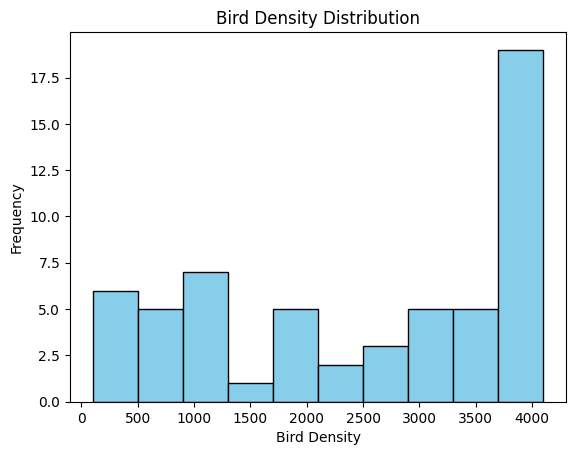

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Bird Density'], bins=10, color='skyblue', edgecolor='black')
plt.title('Bird Density Distribution')
plt.xlabel('Bird Density')
plt.ylabel('Frequency')
plt.show()


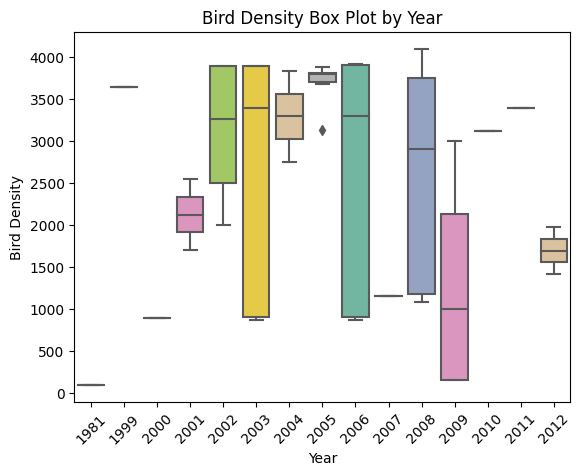

In [ ]:
import seaborn as sns
sns.boxplot(x='Year', y='Bird Density', data=df, palette='Set2')
plt.title('Bird Density Box Plot by Year')
plt.xticks(rotation=45)
plt.show()


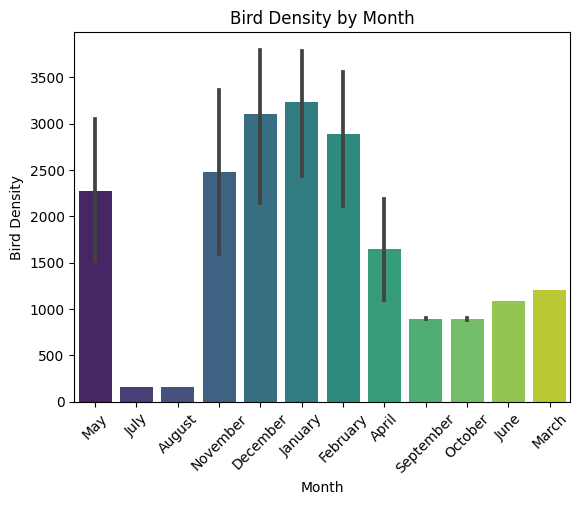

In [ ]:
import seaborn as sns
sns.barplot(x='Month', y='Bird Density', data=df, palette='viridis')
plt.title('Bird Density by Month')
plt.xticks(rotation=45)
plt.show()


# Correlation Heatmap

<ipython-input-16-0283f601a8af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


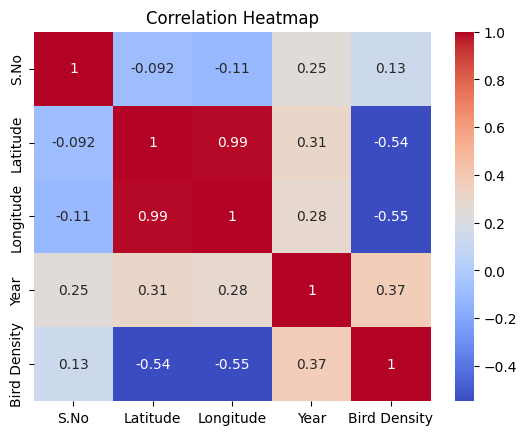

In [ ]:
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-18-101006e9f6db>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


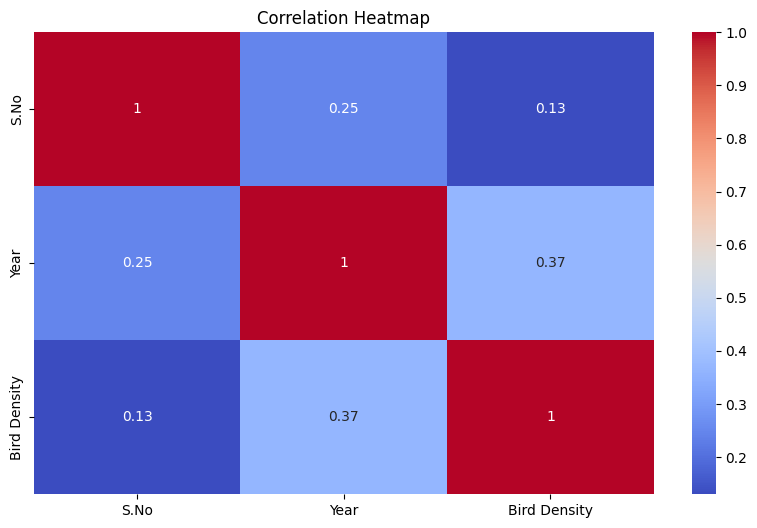

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the Excel file
df = pd.read_excel("datasetbirds.xlsx")

# Map month names to numerical labels
month_labels = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
#df['Months'] = df['Month'].map(month_labels)

# Create the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()



# Plotting pairwise relationships in the dataset

It creates a matrix of Scatterplots (Off-diagonal) where the spread and shape of the points can provide insights into the relationship between variables and KDE plots on the diagonal which show the estimated distribution of each variable.
The pair plot is a useful tool for initial exploratory data analysis, helping to identify patterns and relationships in the data.

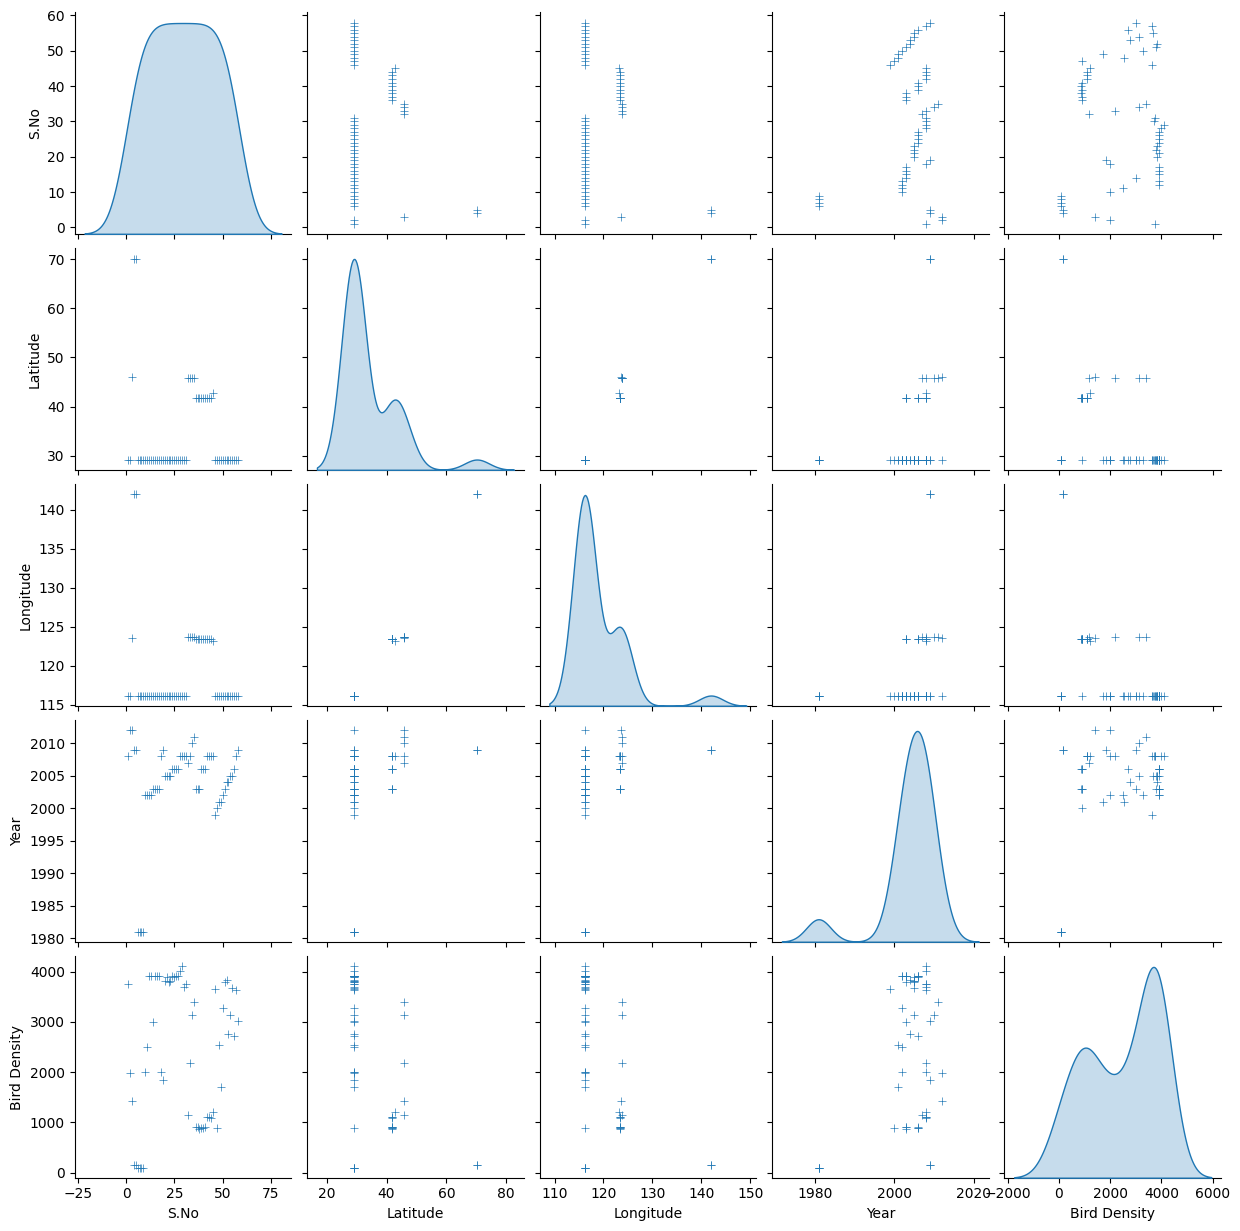

In [12]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde', markers='+')
plt.show()


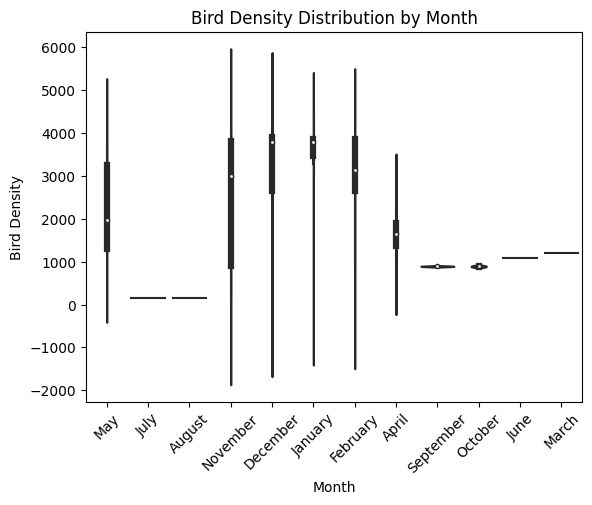

In [ ]:
import seaborn as sns
sns.violinplot(x='Month', y='Bird Density', data=df, palette='viridis')
plt.title('Bird Density Distribution by Month')
plt.xticks(rotation=45)
plt.show()


# Joint Plot with Regression Line

The joint plot displays a scatterplot of bird density against the year.
It also includes a regression line showing the linear relationship between the two variables.
This plot helps visualize the trend or association between bird density and the year of observation

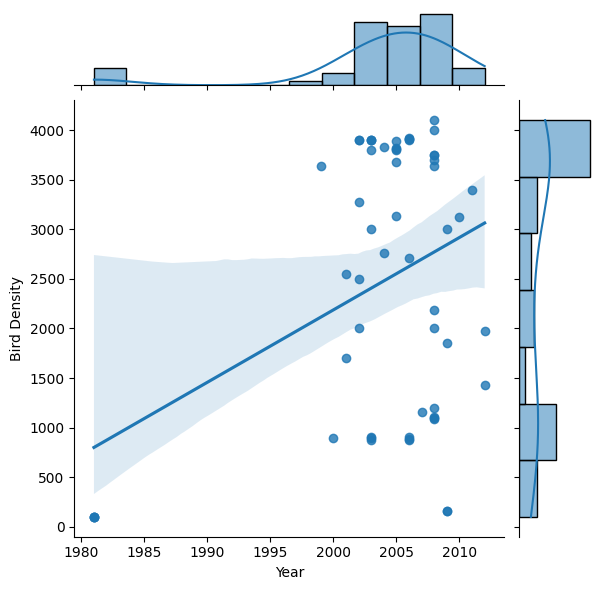

In [ ]:
import seaborn as sns
sns.jointplot(x='Year', y='Bird Density', data=df, kind='reg')
plt.show()


# Joint Plot with Latitude-Based Coloring
A joint plot is created with bird density on the x-axis and year on the y-axis.
It uses a colormap ("coolwarm") to color the dots based on the latitude of observations.
A colorbar is added on the right side to indicate the latitude values.
This plot allows you to explore the bird density with additional information related to latitude

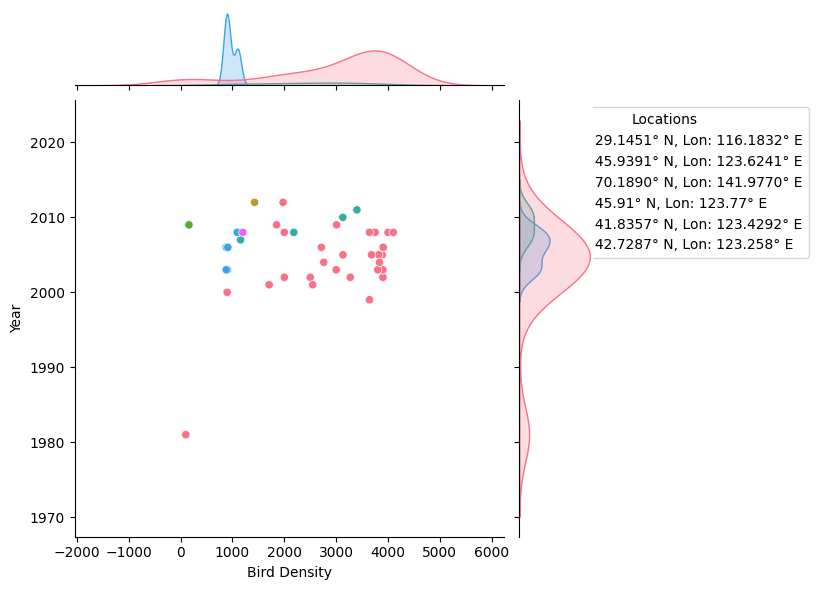

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a unique color for each unique latitude and longitude combination
unique_locations = df[['Latitude', 'Longitude']].drop_duplicates()
location_colors = sns.color_palette('husl', n_colors=len(unique_locations))

# Create a dictionary to map unique locations to their corresponding colors
location_to_color = dict(zip(unique_locations.apply(tuple, axis=1), location_colors))

# Map latitude and longitude combinations to their respective colors in the DataFrame
df['Location Color'] = df.apply(lambda row: location_to_color[(row['Latitude'], row['Longitude'])], axis=1)

# Create the joint plot
g = sns.jointplot(data=df, x='Bird Density', y='Year', kind='scatter', hue='Location Color', palette=location_colors)

# Remove the default legend from the joint plot
g.ax_joint.get_legend().remove()

# Create a separate legend
legend_labels = [f"Lat: {lat}, Lon: {lon}" for lat, lon in unique_locations.to_numpy()]
legend = plt.legend(title='Locations', handles=g.ax_joint.collections, labels=legend_labels, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()


# END of Segment-I

# Weather Dataset

Datasets about weather conditions for each of the bird  hotspot

For each of the place in dataset

1.   Import the Dataset and Display Basic Statistics
2.   Line Chart for Temperature Trends (shows the variations in maximum, minimum, and mean temperatures)
3.   Histogram for Wind Speed and Wind Gusts (valuable for understanding the wind conditions in the region)
4.   Bar Chart for Monthly Precipitation, Rain, and Snowfall (Seasonal patterns and the dominant type of precipitation in different months can be inferred)

By analyzing temperature, wind, and precipitation together, we can gain insights into the overall climate patterns in different regions. For example, we might observe whether there are certain seasons with higher temperatures, windy periods, or significant precipitation.



 time-series dataset with various weather-related attributes recorded daily from January 1, 1981, to December 31, 2012. Below is the breakdown of the columns:

*    time: The date in the format DD-MM-YYYY, representing the day of the observation.
*    temperature_2m_max(c): Maximum temperature at 2 meters above the ground level (in degrees Celsius) recorded on the given date.
*    temperature_2m_min(c): Minimum temperature at 2 meters above the ground level (in degrees Celsius) recorded on the given date.
*    temperature_2m_mean: Mean temperature at 2 meters above the ground level recorded on the given date.
*    precipitation_sum(mm): Total precipitation (in millimeters) recorded on the given date.
*    rain_sum(mm): Total rainfall (in millimeters) recorded on the given date.
*    snowfall_sum(cm): Total snowfall (in centimeters) recorded on the given date.
*    wind_speed_10m_max(km/h): Maximum wind speed at 10 meters above the ground level (in kilometers per hour) recorded on the given date.
*    wind_gusts_10m_max(km/h): Maximum wind gusts at 10 meters above the ground level (in kilometers per hour) recorded on the given date.
*    wind_direction_10m_dominant: Dominant wind direction at 10 meters above the ground level recorded on the given date.

In [ ]:
import pandas as pd

# Import the dataset
df = pd.read_csv('LiaoningProvince.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic statistics of the numerical columns
print(df.describe())

         time  temperature_2m_max(c)  temperature_2m_min(c)  \
0  01-01-1981                  -14.4                  -20.6   
1  02-01-1981                  -15.7                  -25.9   
2  03-01-1981                  -17.8                  -32.0   
3  04-01-1981                  -15.7                  -27.5   
4  05-01-1981                  -16.9                  -25.8   

   temperature_2m_mean  precipitation_sum(mm)  rain_sum(mm)  snowfall_sum(cm)  \
0                -16.8                    2.4           0.0              1.89   
1                -21.5                    0.0           0.0              0.00   
2                -25.1                    0.0           0.0              0.00   
3                -22.3                    0.0           0.0              0.00   
4                -21.4                    0.0           0.0              0.00   

   wind_speed_10m_max(km/h)  wind_gusts_10m_max(km/h)  \
0                      34.7                      59.8   
1                   

       temperature_2m_max(c)  temperature_2m_min(c)  temperature_2m_mean  \
count           11688.000000           11688.000000         11688.000000   
mean               13.627524               3.271501             8.276429   
std                13.105970              13.641277            13.189008   
min               -25.900000             -37.300000           -31.000000   
25%                 2.400000              -7.800000            -2.800000   
50%                16.100000               4.700000            10.300000   
75%                25.500000              15.800000            20.400000   
max                37.400000              27.200000            30.400000   

       precipitation_sum(mm)  rain_sum(mm)  snowfall_sum(cm)  \
count           11688.000000  11688.000000      11688.000000   
mean                2.376805      2.240957          0.102700   
std                 7.580107      7.520447          0.706664   
min                 0.000000      0.000000          0.00000

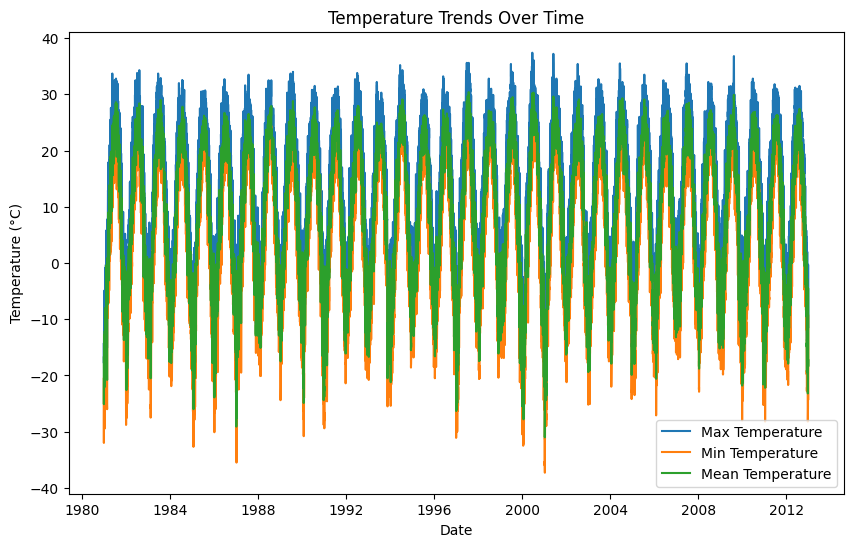

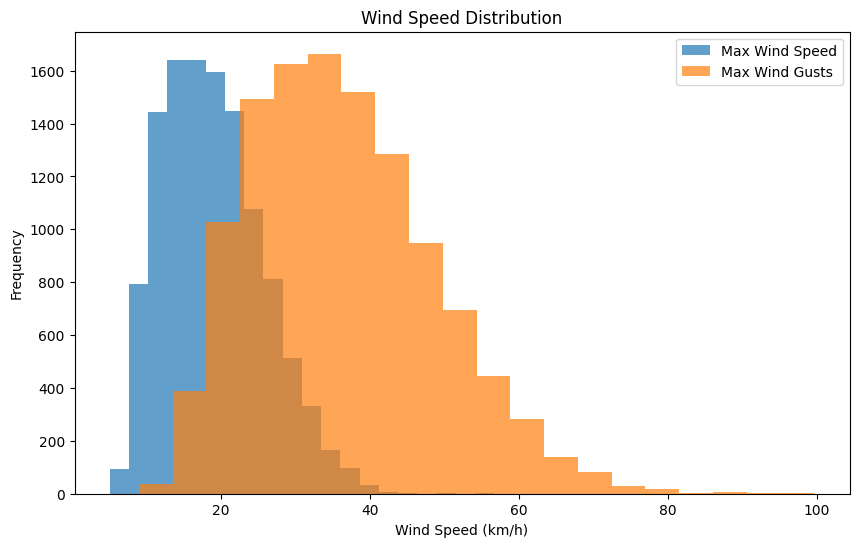

<ipython-input-13-f876c8aa07e7>:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('month').mean()  # Aggregate data by month


<Figure size 1000x600 with 0 Axes>

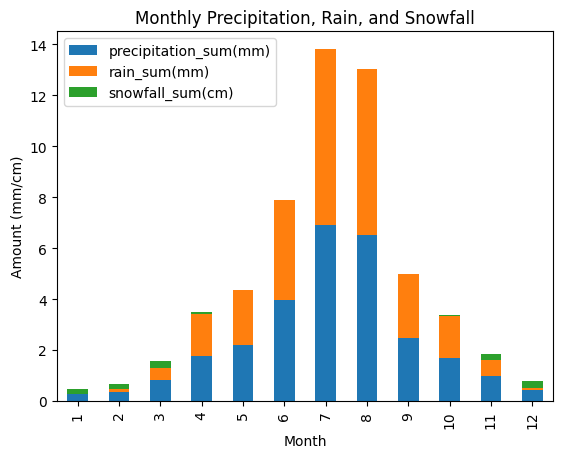

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset
df = pd.read_csv('LiaoningProvince.csv')

# Display basic statistics of the numerical columns
print(df.describe())

# Line chart for temperature trends over time
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')
df.set_index('time', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['temperature_2m_max(c)'], label='Max Temperature')
plt.plot(df['temperature_2m_min(c)'], label='Min Temperature')
plt.plot(df['temperature_2m_mean'], label='Mean Temperature')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Histogram for wind speed and wind gusts
plt.figure(figsize=(10, 6))
plt.hist(df['wind_speed_10m_max(km/h)'], bins=20, alpha=0.7, label='Max Wind Speed')
plt.hist(df['wind_gusts_10m_max(km/h)'], bins=20, alpha=0.7, label='Max Wind Gusts')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Import the dataset
df = pd.read_csv('LiaoningProvince.csv')

# Extract the year from the 'time' column
df['month'] = pd.to_datetime(df['time'], format='%d-%m-%Y').dt.month

# Bar chart for precipitation, rain, and snowfall
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('month').mean()  # Aggregate data by month
df_grouped[['precipitation_sum(mm)', 'rain_sum(mm)', 'snowfall_sum(cm)']].plot(kind='bar', stacked=True)
plt.title('Monthly Precipitation, Rain, and Snowfall')
plt.xlabel('Month')
plt.ylabel('Amount (mm/cm)')

plt.show()


       temperature_2m_max(c)  temperature_2m_min(c)  temperature_2m_mean  \
count           11688.000000           11688.000000         11688.000000   
mean               -9.667189             -15.815323           -12.713604   
std                18.011496              17.491599            17.709565   
min               -47.700000             -50.600000           -48.900000   
25%               -26.000000             -32.000000           -28.900000   
50%                -9.800000             -16.600000           -13.150000   
75%                 5.300000               0.700000             3.100000   
max                33.300000              21.300000            27.800000   

       precipitation_sum(mm)  rain_sum(mm)  snowfall_sum(cm)  \
count           11688.000000  11688.000000      11688.000000   
mean                0.705801      0.437226          0.263326   
std                 2.193667      1.841095          0.795838   
min                 0.000000      0.000000          0.00000

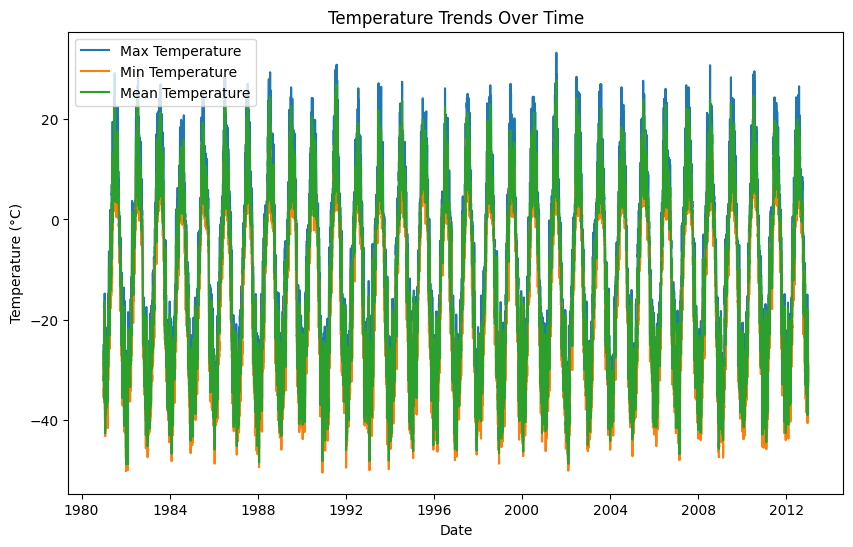

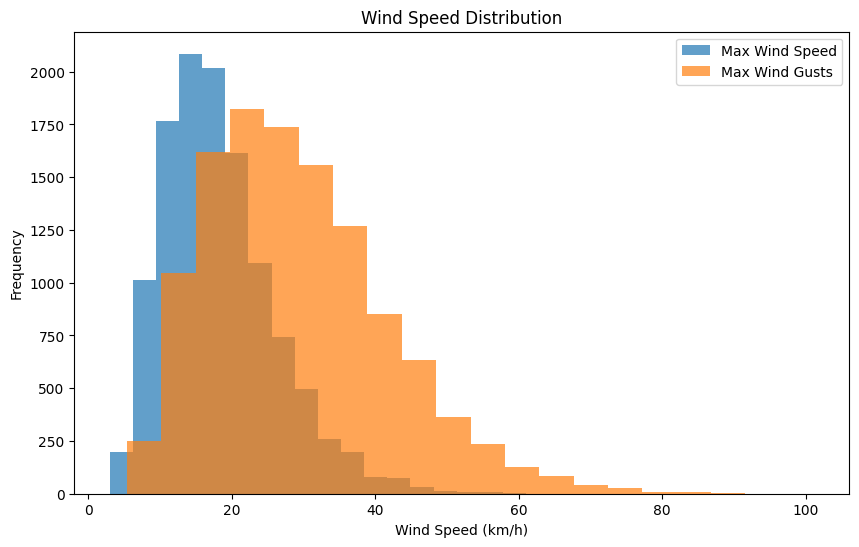

<ipython-input-80-0f7954a6e9ae>:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('month').mean()  # Aggregate data by month


<Figure size 1000x600 with 0 Axes>

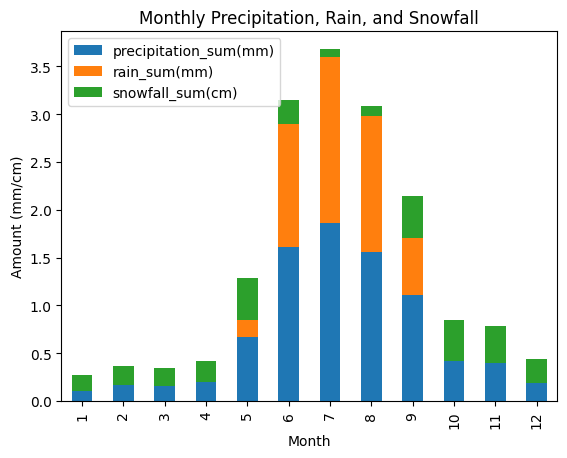

In [ ]:
# Import the dataset
df = pd.read_csv('Yukatia Region.csv')

# Display basic statistics of the numerical columns
print(df.describe())

# Line chart for temperature trends over time
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')
df.set_index('time', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['temperature_2m_max(c)'], label='Max Temperature')
plt.plot(df['temperature_2m_min(c)'], label='Min Temperature')
plt.plot(df['temperature_2m_mean'], label='Mean Temperature')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Histogram for wind speed and wind gusts
plt.figure(figsize=(10, 6))
plt.hist(df['wind_speed_10m_max(km/h)'], bins=20, alpha=0.7, label='Max Wind Speed')
plt.hist(df['wind_gusts_10m_max(km/h)'], bins=20, alpha=0.7, label='Max Wind Gusts')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Import the dataset
df = pd.read_csv('Yukatia Region.csv')

# Extract the year from the 'time' column
df['month'] = pd.to_datetime(df['time'], format='%d-%m-%Y').dt.month

# Bar chart for precipitation, rain, and snowfall
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('month').mean()  # Aggregate data by month
df_grouped[['precipitation_sum(mm)', 'rain_sum(mm)', 'snowfall_sum(cm)']].plot(kind='bar', stacked=True)
plt.title('Monthly Precipitation, Rain, and Snowfall')
plt.xlabel('Month')
plt.ylabel('Amount (mm/cm)')

plt.show()

       temperature_2m_max(c)  temperature_2m_min(c)  temperature_2m_mean  \
count           11688.000000           11688.000000         11688.000000   
mean               21.459155              15.646663            18.432931   
std                 9.005084               8.950124             8.802951   
min                -2.700000              -8.400000            -5.300000   
25%                13.700000               7.600000            10.500000   
50%                22.600000              16.500000            19.500000   
75%                29.200000              23.600000            26.100000   
max                39.400000              32.200000            35.700000   

       precipitation_sum(mm)  rain_sum(mm)  snowfall_sum(cm)  \
count           11688.000000  11688.000000      11688.000000   
mean                5.392343      5.359548          0.023585   
std                11.783485     11.775571          0.333675   
min                 0.000000      0.000000          0.00000

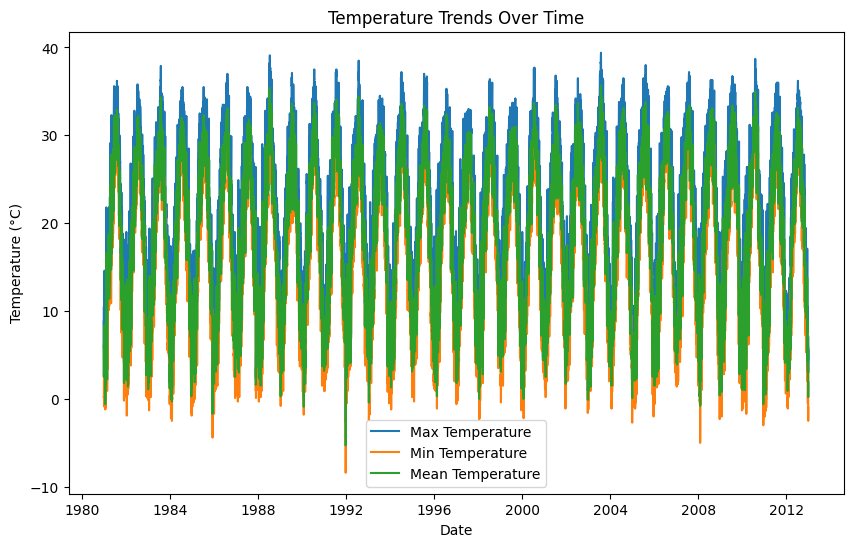

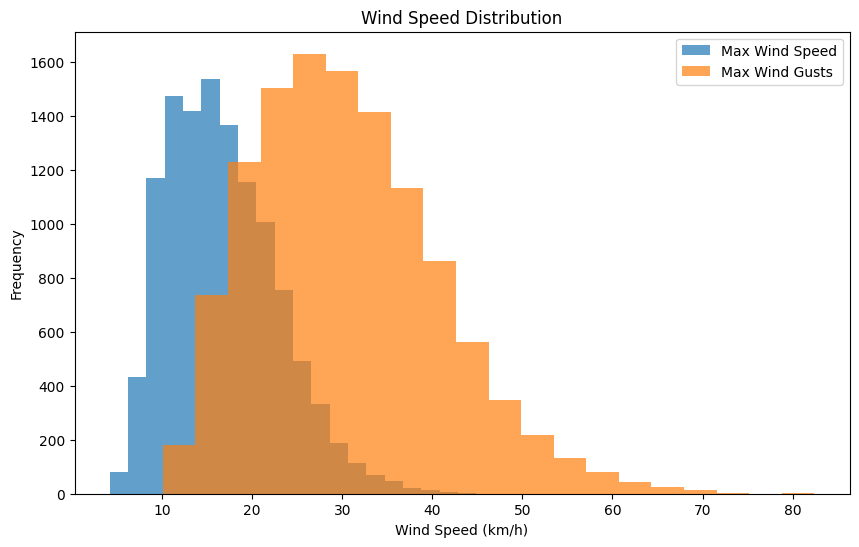

<ipython-input-81-9a4c0c04b753>:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('month').mean()  # Aggregate data by month


<Figure size 1000x600 with 0 Axes>

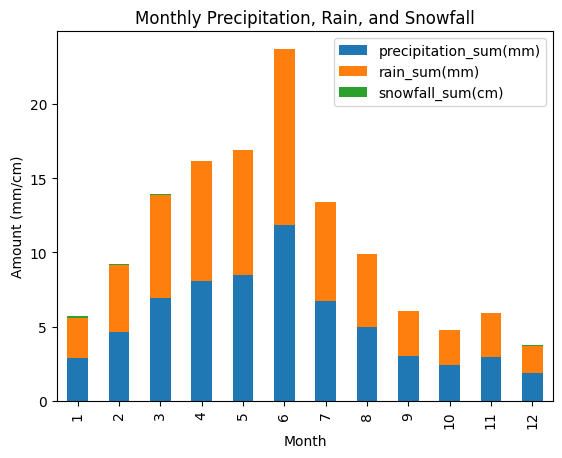

In [ ]:
# Import the dataset
df = pd.read_csv('PoyangLake.csv')

# Display basic statistics of the numerical columns
print(df.describe())

# Line chart for temperature trends over time
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')
df.set_index('time', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['temperature_2m_max(c)'], label='Max Temperature')
plt.plot(df['temperature_2m_min(c)'], label='Min Temperature')
plt.plot(df['temperature_2m_mean'], label='Mean Temperature')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Histogram for wind speed and wind gusts
plt.figure(figsize=(10, 6))
plt.hist(df['wind_speed_10m_max(km/h)'], bins=20, alpha=0.7, label='Max Wind Speed')
plt.hist(df['wind_gusts_10m_max(km/h)'], bins=20, alpha=0.7, label='Max Wind Gusts')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Import the dataset
df = pd.read_csv('PoyangLake.csv')

# Extract the year from the 'time' column
df['month'] = pd.to_datetime(df['time'], format='%d-%m-%Y').dt.month

# Bar chart for precipitation, rain, and snowfall
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('month').mean()  # Aggregate data by month
df_grouped[['precipitation_sum(mm)', 'rain_sum(mm)', 'snowfall_sum(cm)']].plot(kind='bar', stacked=True)
plt.title('Monthly Precipitation, Rain, and Snowfall')
plt.xlabel('Month')
plt.ylabel('Amount (mm/cm)')

plt.show()

       temperature_2m_max(c)  temperature_2m_min(c)  temperature_2m_mean  \
count           11323.000000           11323.000000         11323.000000   
mean               10.500026               0.686161             5.491433   
std                14.842631              14.829220            14.715504   
min               -28.300000             -38.200000           -34.000000   
25%                -2.900000             -12.300000            -7.500000   
50%                12.900000               2.100000             7.400000   
75%                24.000000              14.300000            19.200000   
max                39.300000              26.400000            31.500000   

       precipitation_sum(mm)  rain_sum(mm)  snowfall_sum(cm)  \
count           11323.000000  11323.000000      11323.000000   
mean                1.205590      1.129754          0.063534   
std                 4.027034      3.979515          0.428049   
min                 0.000000      0.000000          0.00000

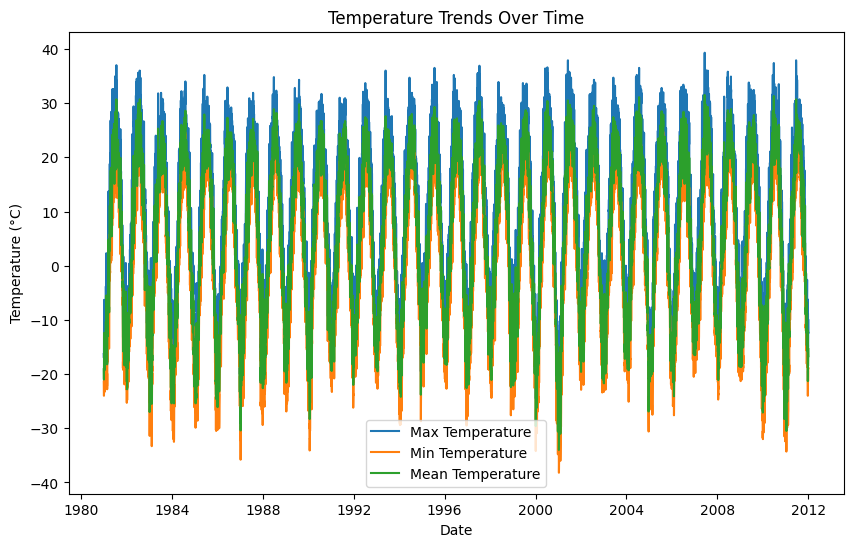

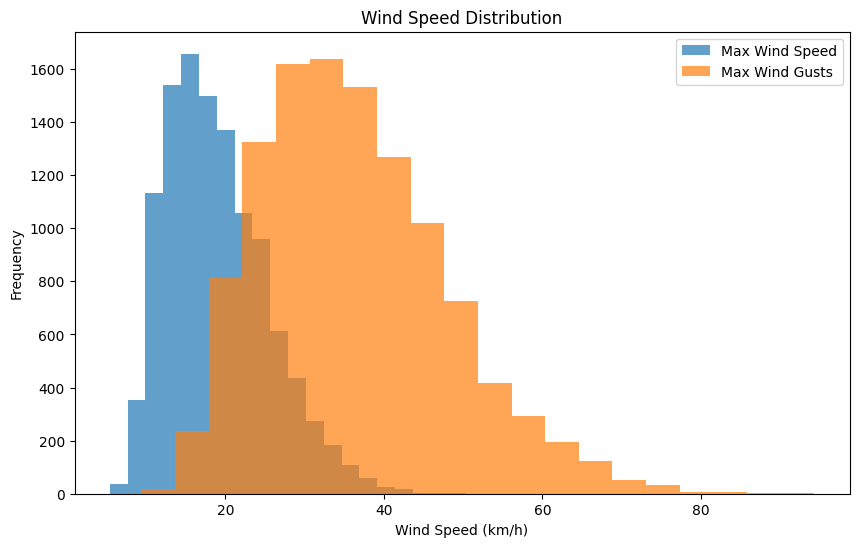

<ipython-input-82-ec8c71510a01>:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('month').mean()  # Aggregate data by month


<Figure size 1000x600 with 0 Axes>

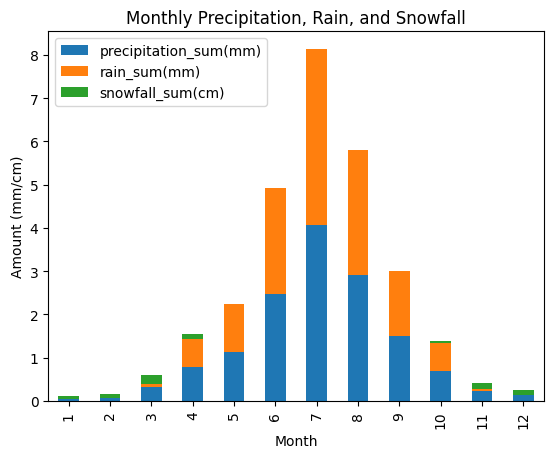

In [ ]:
# Import the dataset
df = pd.read_csv('MomogeReserve.csv')

# Display basic statistics of the numerical columns
print(df.describe())

# Line chart for temperature trends over time
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')
df.set_index('time', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['temperature_2m_max(c)'], label='Max Temperature')
plt.plot(df['temperature_2m_min(c)'], label='Min Temperature')
plt.plot(df['temperature_2m_mean'], label='Mean Temperature')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Histogram for wind speed and wind gusts
plt.figure(figsize=(10, 6))
plt.hist(df['wind_speed_10m_max(km/h)'], bins=20, alpha=0.7, label='Max Wind Speed')
plt.hist(df['wind_gusts_10m_max(km/h)'], bins=20, alpha=0.7, label='Max Wind Gusts')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Import the dataset
df = pd.read_csv('MomogeReserve.csv')

# Extract the year from the 'time' column
df['month'] = pd.to_datetime(df['time'], format='%d-%m-%Y').dt.month

# Bar chart for precipitation, rain, and snowfall
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('month').mean()  # Aggregate data by month
df_grouped[['precipitation_sum(mm)', 'rain_sum(mm)', 'snowfall_sum(cm)']].plot(kind='bar', stacked=True)
plt.title('Monthly Precipitation, Rain, and Snowfall')
plt.xlabel('Month')
plt.ylabel('Amount (mm/cm)')

plt.show()

       temperature_2m_max(c)  temperature_2m_min(c)  temperature_2m_mean  \
count           11323.000000           11323.000000         11323.000000   
mean               12.806897               2.650057             7.548132   
std                13.285749              13.669771            13.357506   
min               -26.100000             -37.200000           -31.900000   
25%                 1.200000              -8.600000            -3.800000   
50%                15.300000               3.900000             9.500000   
75%                24.900000              15.200000            19.900000   
max                36.900000              26.800000            30.000000   

       precipitation_sum(mm)  rain_sum(mm)  snowfall_sum(cm)  \
count           11323.000000  11323.000000      11323.000000   
mean                1.820489      1.720675          0.077425   
std                 6.215080      6.176500          0.560161   
min                 0.000000      0.000000          0.00000

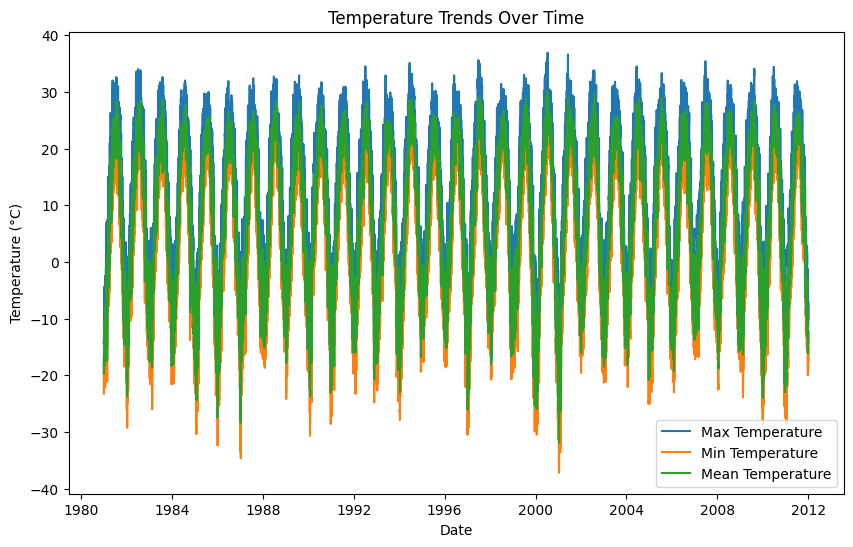

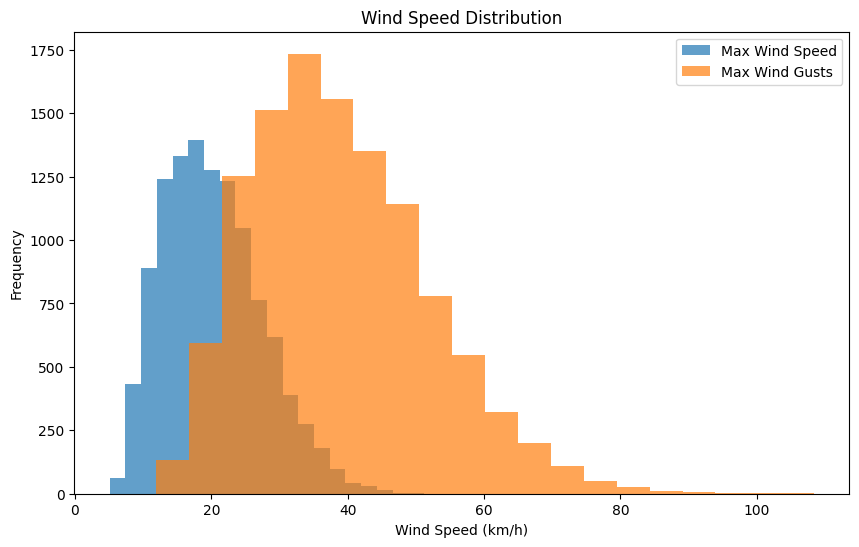

<ipython-input-83-629c7368dc56>:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('month').mean()  # Aggregate data by month


<Figure size 1000x600 with 0 Axes>

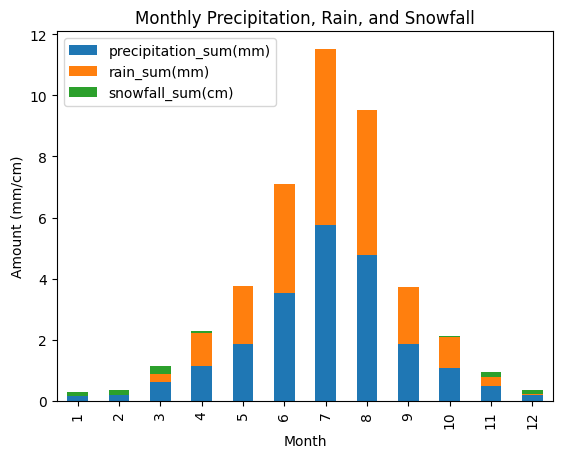

In [ ]:
# Import the dataset
df = pd.read_csv('WolongLake.csv')

# Display basic statistics of the numerical columns
print(df.describe())

# Line chart for temperature trends over time
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')
df.set_index('time', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['temperature_2m_max(c)'], label='Max Temperature')
plt.plot(df['temperature_2m_min(c)'], label='Min Temperature')
plt.plot(df['temperature_2m_mean'], label='Mean Temperature')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Histogram for wind speed and wind gusts
plt.figure(figsize=(10, 6))
plt.hist(df['wind_speed_10m_max(km/h)'], bins=20, alpha=0.7, label='Max Wind Speed')
plt.hist(df['wind_gusts_10m_max(km/h)'], bins=20, alpha=0.7, label='Max Wind Gusts')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Import the dataset
df = pd.read_csv('WolongLake.csv')

# Extract the year from the 'time' column
df['month'] = pd.to_datetime(df['time'], format='%d-%m-%Y').dt.month

# Bar chart for precipitation, rain, and snowfall
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('month').mean()  # Aggregate data by month
df_grouped[['precipitation_sum(mm)', 'rain_sum(mm)', 'snowfall_sum(cm)']].plot(kind='bar', stacked=True)
plt.title('Monthly Precipitation, Rain, and Snowfall')
plt.xlabel('Month')
plt.ylabel('Amount (mm/cm)')

plt.show()

# Visualisation of bird count for weather features

breakdown of the columns in the dataset:

* S.No: Serial number or identifier for each record.
*  Latitude: Latitude coordinates of the location where bird density is recorded.
* Longitude: Longitude coordinates of the location where bird density is recorded.
*    Month: The month during which the observation was made.
*    Year: The year of the observation.
*    Bird Density: The density of birds observed in a specific location, likely measured as the number of birds per unit area.
*    temperature_2m_max(c): Maximum temperature at 2 meters above the ground level (in degrees Celsius).
*    temperature_2m_min(c): Minimum temperature at 2 meters above the ground level (in degrees Celsius).
*    temperature_2m_mean: Mean temperature at 2 meters above the ground level.
*    precipitation_sum(mm): Total precipitation (in millimeters) during the observation period.
*    rain_sum(mm): Total rainfall (in millimeters) during the observation period.
*    snowfall_sum(cm): Total snowfall (in centimeters) during the observation period.
*    wind_speed_10m_max(km/h): Maximum wind speed at 10 meters above the ground level (in kilometers per hour).
*    wind_gusts_10m_max(km/h): Maximum wind gusts at 10 meters above the ground level (in kilometers per hour).
*    wind_direction_10m_dominant: Dominant wind direction at 10 meters above the ground level.

## Scatter plot for bird density vs. max temperature

            S.No         Year  Bird Density  temperature_2m_max(c)  \
count  58.000000    58.000000     58.000000              58.000000   
mean   29.500000  2003.948276   2475.810345              14.155774   
std    16.886879     6.952022   1382.754135               6.269333   
min     1.000000  1981.000000    100.000000               3.940000   
25%    15.250000  2003.000000   1102.750000               9.801613   
50%    29.500000  2005.500000   2880.000000              12.135636   
75%    43.750000  2008.000000   3806.000000              18.030825   
max    58.000000  2012.000000   4101.000000              32.580600   

       temperature_2m_min(c)  temperature_2m_mean  precipitation_sum(mm)  \
count              58.000000            58.000000              58.000000   
mean                7.134883            10.557721               3.490062   
std                 6.077902             6.035911               3.031512   
min                -4.743333            -0.550000               0

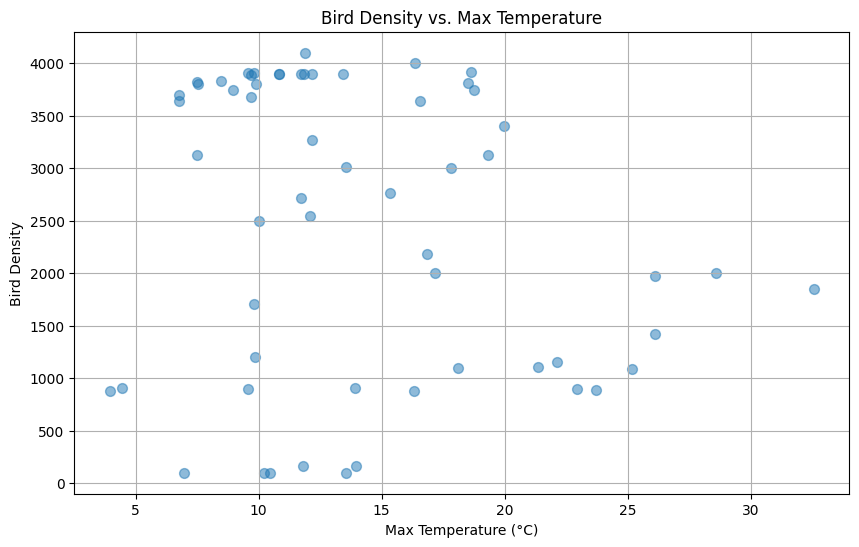

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('datasetbirds_weather.xlsx')

# Display basic statistics of the numerical columns
print(df.describe())

# Scatter plot for bird density vs. max temperature
plt.figure(figsize=(10, 6))
plt.scatter(df['temperature_2m_max(c)'], df['Bird Density'], s=50, alpha=0.5)
plt.title('Bird Density vs. Max Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Bird Density')
plt.grid()
plt.show()


 2x3 grid of scatter plots to visualize the relationship between bird density and various weather-related variables

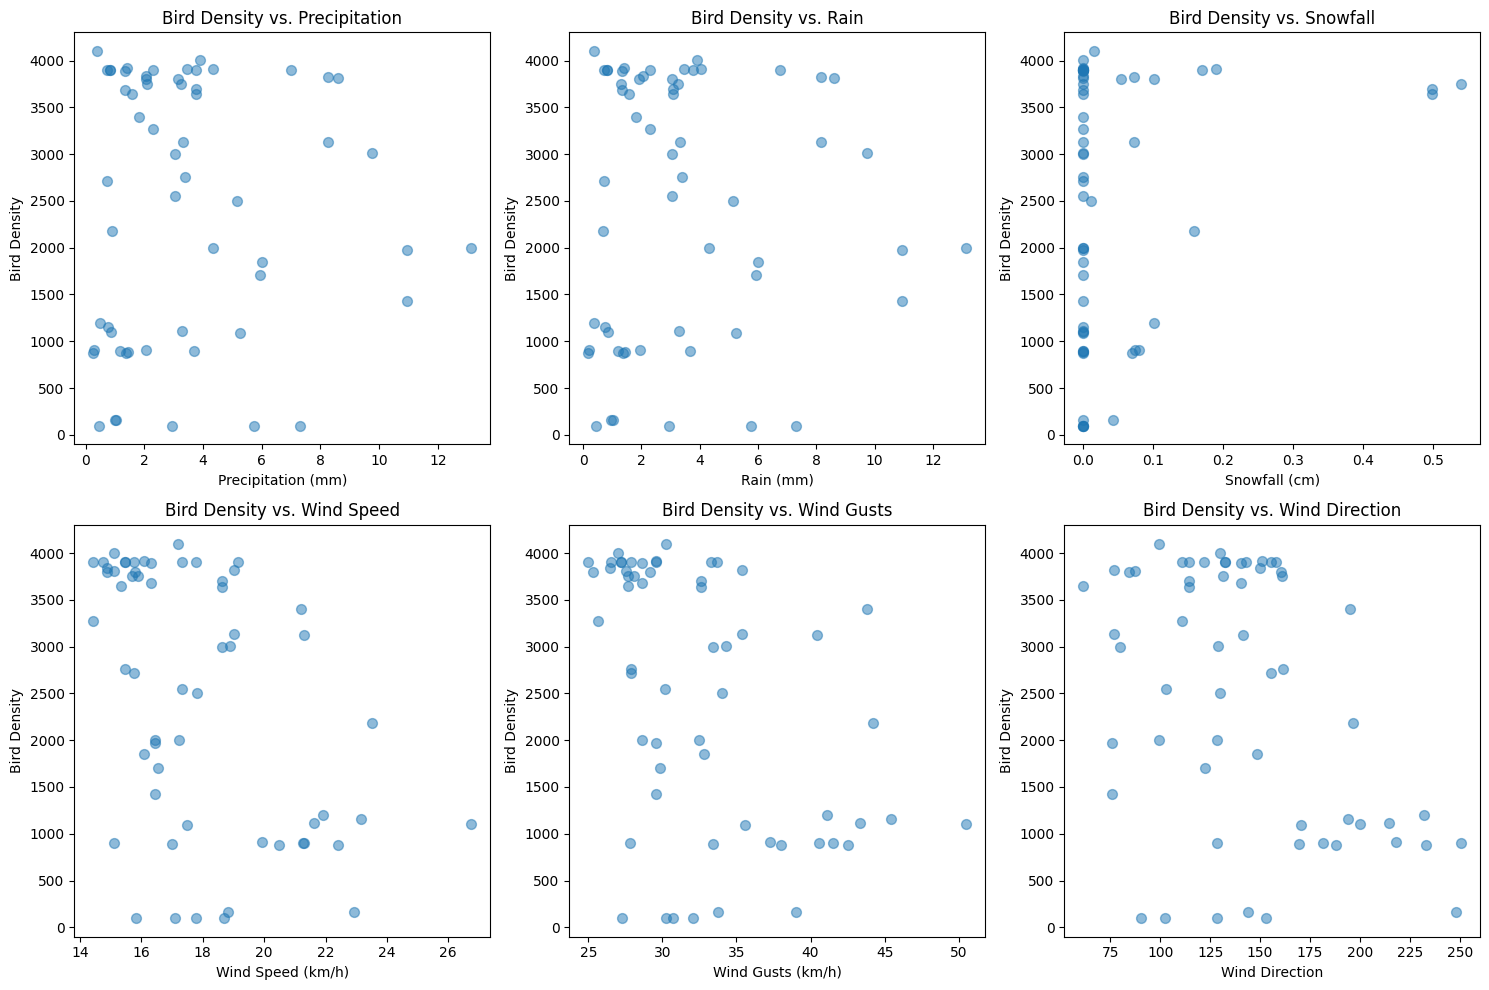

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('datasetbirds_weather.xlsx')

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Scatter plot for bird density vs. precipitation
axes[0, 0].scatter(df['precipitation_sum(mm)'], df['Bird Density'], s=50, alpha=0.5)
axes[0, 0].set_title('Bird Density vs. Precipitation')
axes[0, 0].set_xlabel('Precipitation (mm)')
axes[0, 0].set_ylabel('Bird Density')

# Scatter plot for bird density vs. rain
axes[0, 1].scatter(df['rain_sum(mm)'], df['Bird Density'], s=50, alpha=0.5)
axes[0, 1].set_title('Bird Density vs. Rain')
axes[0, 1].set_xlabel('Rain (mm)')
axes[0, 1].set_ylabel('Bird Density')

# Scatter plot for bird density vs. snowfall
axes[0, 2].scatter(df['snowfall_sum(cm)'], df['Bird Density'], s=50, alpha=0.5)
axes[0, 2].set_title('Bird Density vs. Snowfall')
axes[0, 2].set_xlabel('Snowfall (cm)')
axes[0, 2].set_ylabel('Bird Density')

# Scatter plot for bird density vs. wind speed
axes[1, 0].scatter(df['wind_speed_10m_max(km/h)'], df['Bird Density'], s=50, alpha=0.5)
axes[1, 0].set_title('Bird Density vs. Wind Speed')
axes[1, 0].set_xlabel('Wind Speed (km/h)')
axes[1, 0].set_ylabel('Bird Density')

# Scatter plot for bird density vs. wind gusts
axes[1, 1].scatter(df['wind_gusts_10m_max(km/h)'], df['Bird Density'], s=50, alpha=0.5)
axes[1, 1].set_title('Bird Density vs. Wind Gusts')
axes[1, 1].set_xlabel('Wind Gusts (km/h)')
axes[1, 1].set_ylabel('Bird Density')

# Scatter plot for bird density vs. wind direction
axes[1, 2].scatter(df['wind_direction_10m_dominant'], df['Bird Density'], s=50, alpha=0.5)
axes[1, 2].set_title('Bird Density vs. Wind Direction')
axes[1, 2].set_xlabel('Wind Direction')
axes[1, 2].set_ylabel('Bird Density')

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()


# Heat Map

shows how each variable in the dataset are correlated to one another


<ipython-input-6-ad0e6d624d11>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


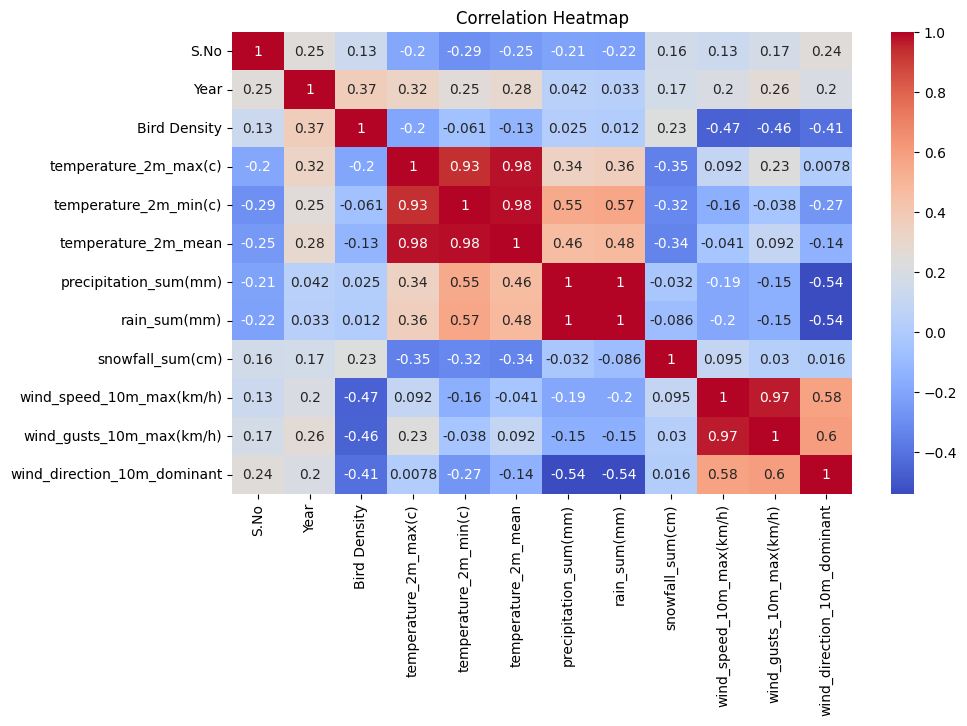

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Monthly Precipitation Composition

> Visualization provides an overview of the monthly composition of precipitation, distinguishing between total, rain, and snowfall.
It helps in understanding the seasonal patterns of different types of precipitation.



<Figure size 1000x600 with 0 Axes>

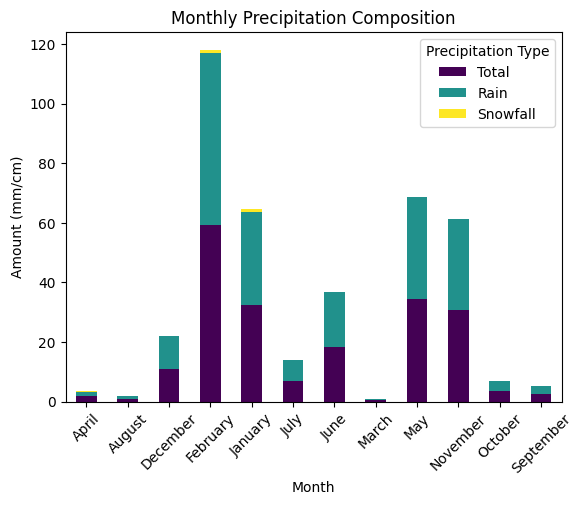

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by month and calculate the sum of precipitation types
monthly_precipitation = df.groupby('Month')[['precipitation_sum(mm)', 'rain_sum(mm)', 'snowfall_sum(cm)']].sum()

plt.figure(figsize=(10, 6))
monthly_precipitation.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Monthly Precipitation Composition')
plt.xlabel('Month')
plt.ylabel('Amount (mm/cm)')
plt.legend(title='Precipitation Type', loc='upper right', labels=['Total', 'Rain', 'Snowfall'])
plt.xticks(rotation=45)
plt.show()




> Extending the previous visualization, it introduces bird density on the same chart.
The line plot helps compare bird density trends with precipitation composition over the months.
It assists in identifying potential correlations or patterns between bird density and precipitation.



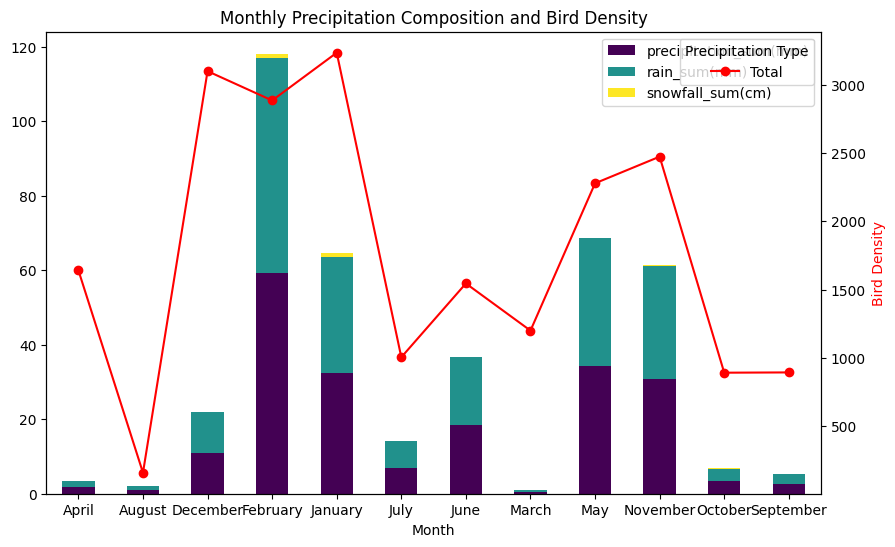

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by month and calculate the sum of precipitation types
monthly_precipitation = df.groupby('Month')[['precipitation_sum(mm)', 'rain_sum(mm)', 'snowfall_sum(cm)']].sum()
monthly_bird_density = df.groupby('Month')['Bird Density'].mean()  # Calculate the mean bird density by month

plt.figure(figsize=(10, 6))

# Create the stacked bar chart for precipitation composition
monthly_precipitation.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# Overlay a line plot for bird density on the same chart
monthly_bird_density.plot(kind='line', marker='o', secondary_y=True, color='r', ax=plt.gca())

plt.title('Monthly Precipitation Composition and Bird Density')
plt.xlabel('Month')
plt.ylabel('Amount (mm/cm)')
plt.legend(title='Precipitation Type', loc='upper right', labels=['Total', 'Rain', 'Snowfall'])
plt.xticks(rotation=45)

# Add a y-axis label for bird density
plt.ylabel('Bird Density', color='r')

plt.show()




>  Generates separate visualizations for specific locations, allowing a more detailed analysis of precipitation and bird density patterns.
It helps in understanding how the relationship between weather factors and bird density varies across different geographical locations.



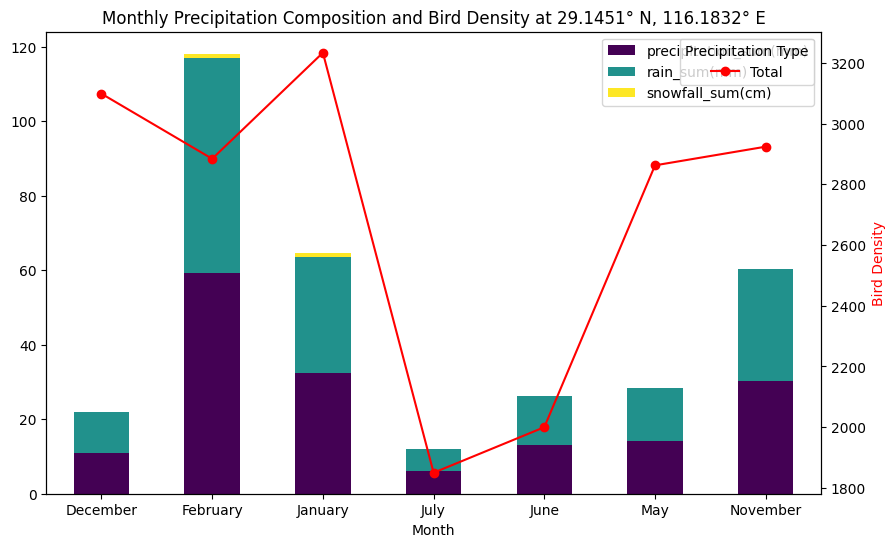

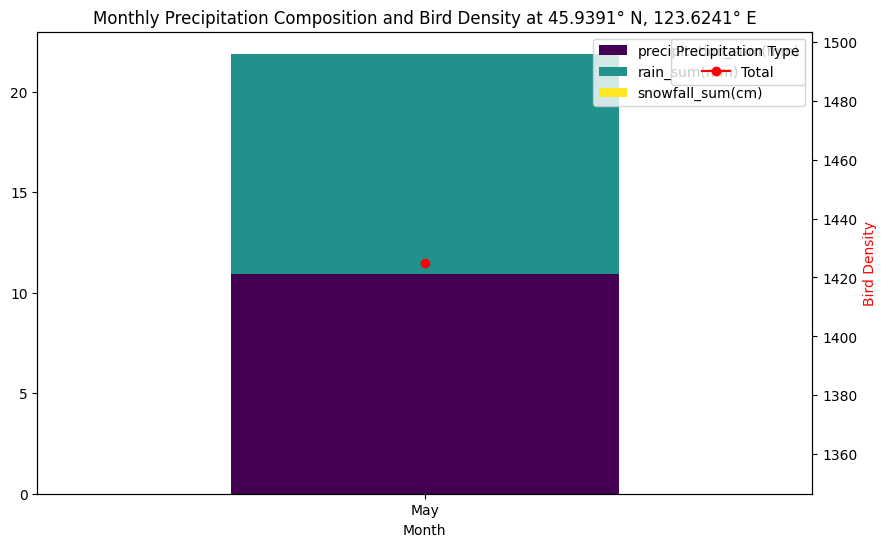

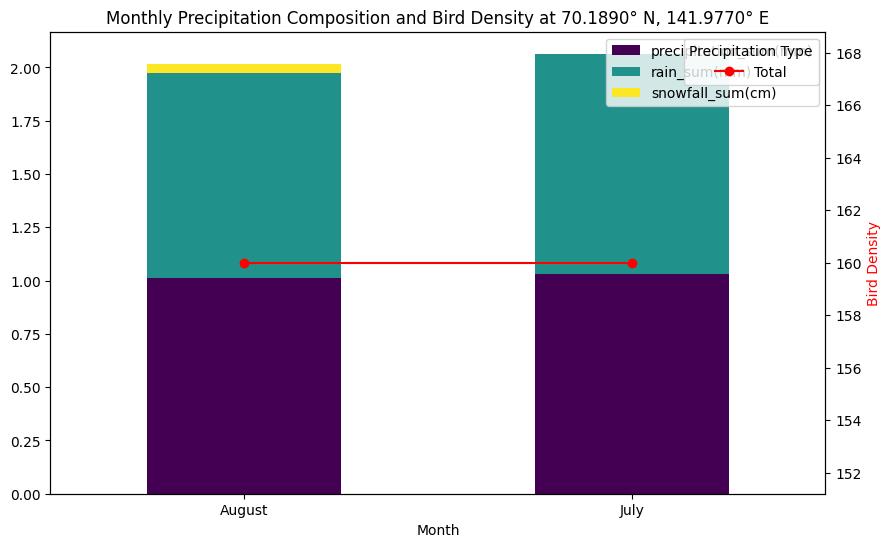

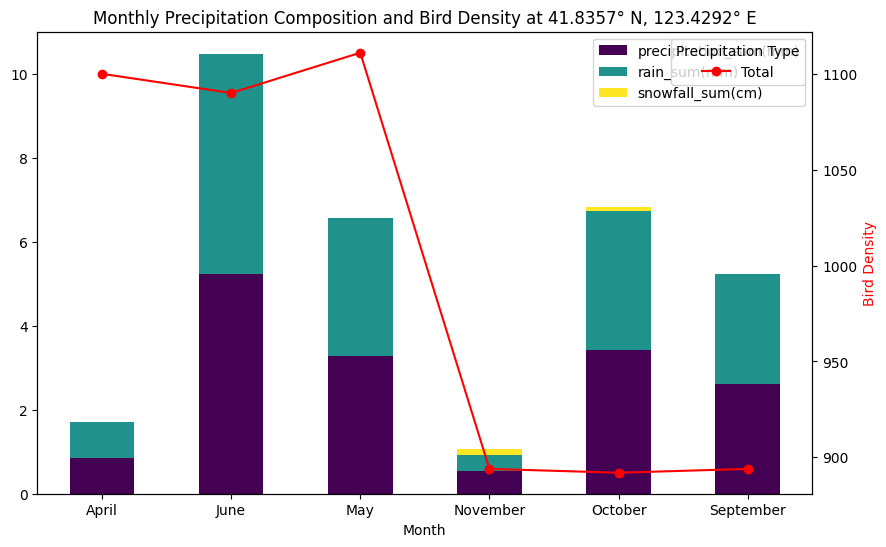

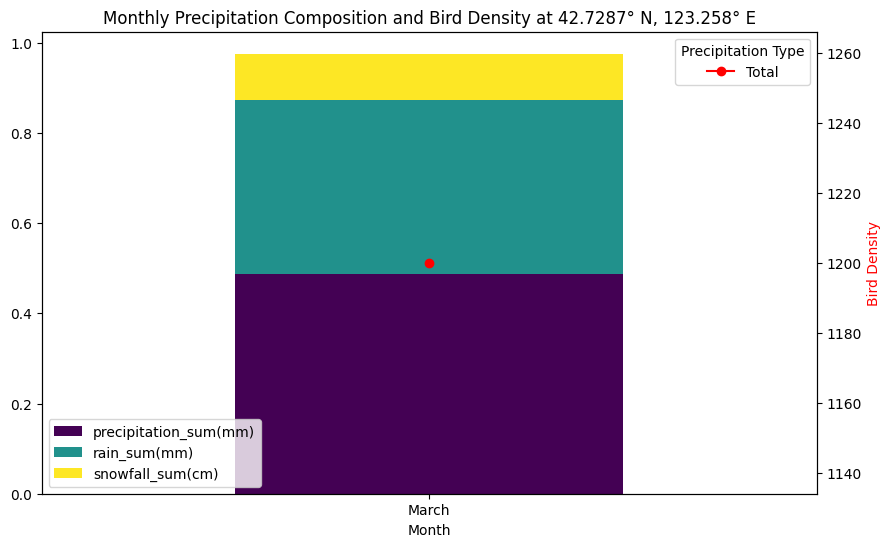

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a list of unique latitude and longitude pairs
locations = [
    ('29.1451° N', '116.1832° E'),
    ('45.9391° N', '123.6241° E'),
    ('70.1890° N', '141.9770° E'),
    ('41.8357° N', '123.4292° E'),
    ('42.7287° N', '123.258° E')
]

# Create separate plots for each location
for location in locations:
    lat, long = location
    subset = df[(df['Latitude'] == lat) & (df['Longitude'] == long)]

    # Group data by month and calculate the sum of precipitation types
    monthly_precipitation = subset.groupby('Month')[['precipitation_sum(mm)', 'rain_sum(mm)', 'snowfall_sum(cm)']].sum()
    monthly_bird_density = subset.groupby('Month')['Bird Density'].mean()  # Calculate the mean bird density by month

    plt.figure(figsize=(10, 6))

    # Create the stacked bar chart for precipitation composition
    monthly_precipitation.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

    # Overlay a line plot for bird density on the same chart
    monthly_bird_density.plot(kind='line', marker='o', secondary_y=True, color='r', ax=plt.gca())

    plt.title(f'Monthly Precipitation Composition and Bird Density at {lat}, {long}')
    plt.xlabel('Month')
    plt.ylabel('Amount (mm/cm)')
    plt.legend(title='Precipitation Type', loc='upper right', labels=['Total', 'Rain', 'Snowfall'])
    plt.xticks(rotation=45)

    # Add a y-axis label for bird density
    plt.ylabel('Bird Density', color='r')

    plt.show()


We can infer where the birds prefer to migrate over the year

# Websit for Interactive MAP

In [5]:
pip install folium


 Data preprocessing is done - converts the 'Latitude' and 'Longitude' columns to numeric values

In [15]:
import pandas as pd

# Read the data from the Excel file
df = pd.read_excel('datasetbirds_weather.xlsx')

# Function to clean and convert latitude and longitude to numeric values
def clean_lat_long(lat_long_str):
    # Remove the degree symbol (°) and "N"/"E" and convert to float
    try:
        lat_long_str = lat_long_str.replace('° N', '').replace('° E', '').strip()
        return float(lat_long_str)
    except ValueError:
        return None

# Apply the cleaning function to Latitude and Longitude columns
df['Latitude'] = df['Latitude'].apply(clean_lat_long)
df['Longitude'] = df['Longitude'].apply(clean_lat_long)

# Drop rows with missing Latitude or Longitude values
df = df.dropna(subset=['Latitude', 'Longitude'])



(using the Folium library plot data points on the map based on latitude and longitude information)

## Interactive map with bird sighting and density
The map provides a visual representation of bird sightings and density across different geographical locations.
The HeatMap gives an overview of the concentration of bird observations, with more intense colors indicating higher bird density.

Layer Control:
Allows toggling between "Bird Sightings" and "Bird Density Observation Data."
Bird Sightings (Circle Markers):

> Bird Sightings (Circle Markers):
Each bird sighting represented by a circle marker on the map.
Popup information includes Latitude, Longitude, Bird Density, Max Temperature (rounded to 2 decimal places), and Precipitation (rounded to 2 decimal places).

> Bird Density Observation Data (HeatMap):
Heatmap representation of bird density observation data.
Intensity of the heatmap indicates the density of bird observations in different areas.





In [32]:
import folium
from folium.plugins import HeatMap

# Create a map centered around the average latitude and longitude
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=4)

# Create feature groups for bird sightings and weather data
bird_sightings = folium.FeatureGroup(name='Bird Sightings')
density_data = folium.FeatureGroup(name='Bird Density Observation Data')

# Add markers for each data point with popups for bird sightings
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        popup=f"Latitude: {row['Latitude']}<br>Longitude: {row['Longitude']}<br>Bird Density: {row['Bird Density']}<br>Max Temp: {round(row['temperature_2m_max(c)'],2)}<br>Precipitation: {round(row['precipitation_sum(mm)'],2)}"
    ).add_to(bird_sightings)

heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(density_data)

# Add the feature groups to the map
bird_sightings.add_to(m)
density_data.add_to(m)

# Add layer control to toggle between bird sightings and weather data
folium.LayerControl().add_to(m)

# Save the interactive map as an HTML file
m.save('Interactive map with bird sighting and density.html')

## Interactive map with bird sighting and weather data
The map provides a visual representation of both bird sightings and weather data at different locations.
The use of marker clusters helps manage the display of numerous data points.
Users can interactively explore the locations with bird sightings and associated weather data.

Layer Control:
Allows toggling between "Bird Sightings" and "Weather Data."
Bird Sightings (Circle Markers):

> Bird Sightings (Marker Cluster):
Each bird sighting represented by a clustered marker on the map.
Popup information includes Bird Density.

> Weather Data (Marker Cluster):
Each weather data point represented by a clustered marker on the map.
Popup information includes rounded Max Temperature (to 2 decimal places).


In [33]:
import folium
from folium.plugins import MarkerCluster


# Create a map centered around the average latitude and longitude
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=4)

# Create Marker Cluster groups for bird sightings and weather data
bird_sightings = MarkerCluster(name='Bird Sightings').add_to(m)
weather_data = MarkerCluster(name='Weather Data').add_to(m)

# Add markers for bird sightings
for _, row in df.iterrows():
    bird_density = row['Bird Density']
    lat, lon = row['Latitude'], row['Longitude']
    folium.Marker([lat, lon], icon=folium.DivIcon(html=f'<div>{bird_density}</div>', icon_size=(30, 30))).add_to(bird_sightings)

# Add markers for weather data
for _, row in df.iterrows():
    temperature_max = row['temperature_2m_max(c)']
    lat, lon = row['Latitude'], row['Longitude']
    folium.Marker([lat, lon], icon=folium.DivIcon(html=f'<div>{round(temperature_max,2)}°C</div>', icon_size=(30, 30))).add_to(weather_data)

# Add layer control to toggle between bird sightings and weather data
folium.LayerControl().add_to(m)

# Save the interactive map as an HTML file
m.save('Interactive map with bird sighting and weather data.html')


.

In [ ]:
pip install plotly


## Scatter plot with a Regression line Bird Density vs. Max Temperature

Explore and visualize the potential relationship between bird density and the maximum temperature. The regression line aids in understanding the general trend or correlation pattern between these two variables



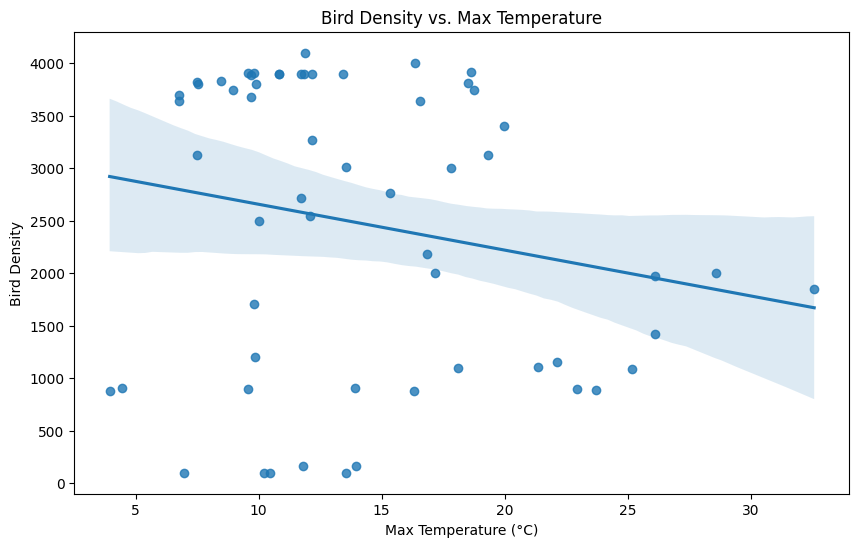

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('datasetbirds_weather.xlsx')

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='temperature_2m_max(c)', y='Bird Density', data=df)
plt.title('Bird Density vs. Max Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Bird Density')
plt.show()



Negative Slope: A downward-sloping regression line indicates a negative correlation. Higher temperatures might be associated with lower bird density.

## Correlation Heatmap (Bird Density and Weather Variables)

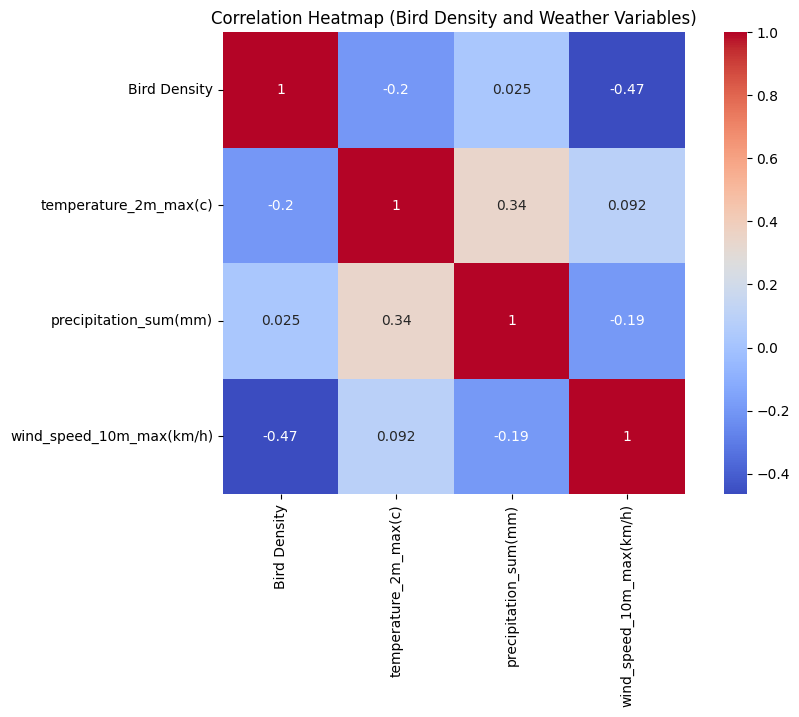

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('datasetbirds_weather.xlsx')

# Calculate the correlation matrix
correlation_matrix = df[['Bird Density', 'temperature_2m_max(c)', 'precipitation_sum(mm)', 'wind_speed_10m_max(km/h)']].corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (Bird Density and Weather Variables)')
plt.show()


# Comparision of trend of weather and bird density over time

Simultaneously explore the temporal patterns of bird density, maximum temperature, and wind speed



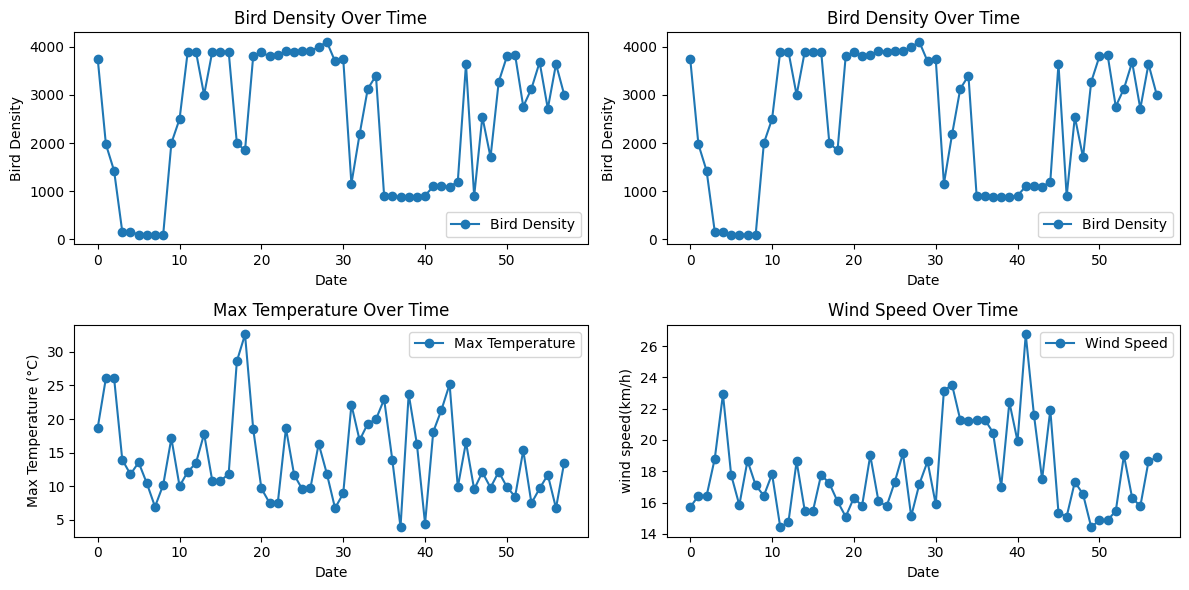

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('datasetbirds_weather.xlsx')

# Create subplots for bird density, max temperature, and precipitation
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Bird Density'], label='Bird Density', marker='o', linestyle='-')
plt.title('Bird Density Over Time')
plt.xlabel('Date')
plt.ylabel('Bird Density')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df.index, df['Bird Density'], label='Bird Density', marker='o', linestyle='-')
plt.title('Bird Density Over Time')
plt.xlabel('Date')
plt.ylabel('Bird Density')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df.index, df['temperature_2m_max(c)'], label='Max Temperature', marker='o', linestyle='-')
plt.title('Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df.index, df['wind_speed_10m_max(km/h)'], label='Wind Speed', marker='o', linestyle='-')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('wind speed(km/h)')
plt.legend()

plt.tight_layout()
plt.show()


# Correlation btn Bird Density and Weather Variables

<ipython-input-30-2b683541bb42>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


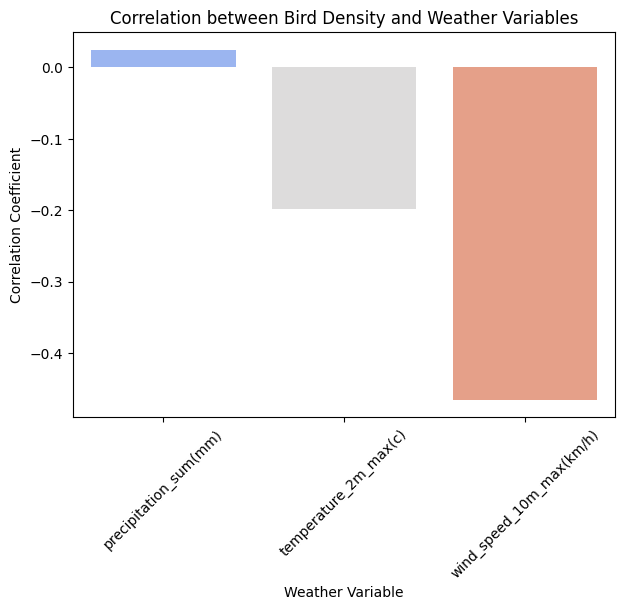

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('datasetbirds_weather.xlsx')

# Calculate correlations between Bird Density and weather variables
correlation_matrix = df.corr()

# Select the weather variables you want to analyze
weather_variables = ['temperature_2m_max(c)', 'precipitation_sum(mm)', 'wind_speed_10m_max(km/h)']

# Create a new DataFrame with correlations
correlation_df = correlation_matrix['Bird Density'][weather_variables]

# Sort the correlations in descending order
correlation_df = correlation_df.sort_values(ascending=False)

# Create a bar plot to visualize the correlations
plt.figure(figsize=(7, 5))
sns.barplot(x=correlation_df.index, y=correlation_df.values, palette='coolwarm')
plt.title('Correlation between Bird Density and Weather Variables')
plt.xlabel('Weather Variable')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()



# Multiple Linear Regression Model

To understand the relationships between bird density and selected weather variables. The summary provides insights into the significance and impact of each variable.



                            OLS Regression Results                            
Dep. Variable:           Bird Density   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     5.704
Date:                Fri, 10 Nov 2023   Prob (F-statistic):            0.00182
Time:                        04:45:34   Log-Likelihood:                -493.26
No. Observations:                  58   AIC:                             994.5
Df Residuals:                      54   BIC:                             1003.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

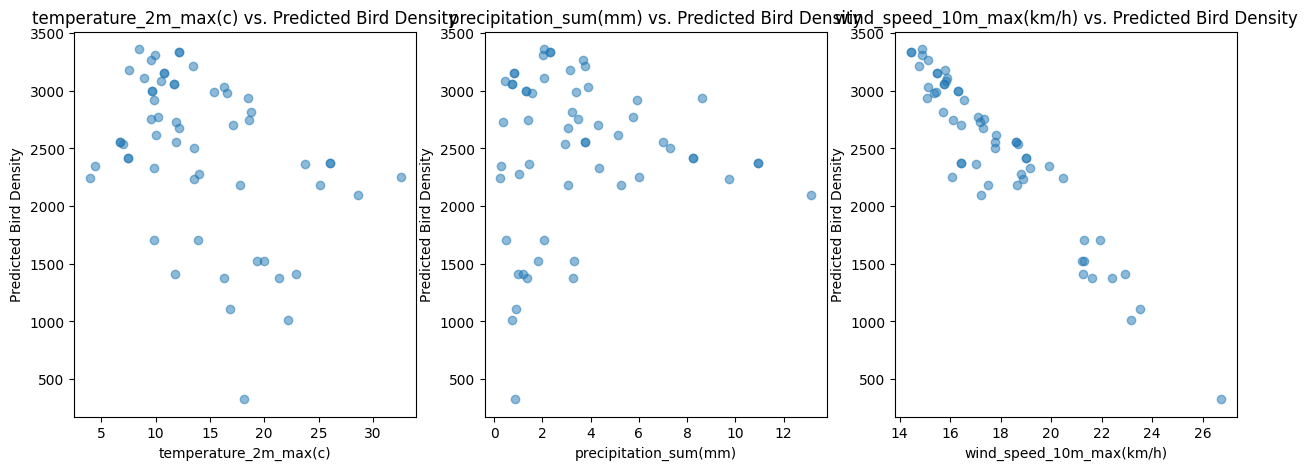

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('datasetbirds_weather.xlsx')

# Select the weather variables as independent variables
X = df[['temperature_2m_max(c)', 'precipitation_sum(mm)', 'wind_speed_10m_max(km/h)']]

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Define the dependent variable (bird density)
y = df['Bird Density']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary to view coefficients and statistics
print(model.summary())

# Plot the relationship between each independent variable and the predicted values
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(X.columns[1:]):
    axes[i].scatter(X[col], model.fittedvalues, alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Predicted Bird Density')
    axes[i].set_title(f'{col} vs. Predicted Bird Density')

plt.show()





*   R-squared (R²): The R-squared value represents the proportion of the variance in the dependent variable (Bird Density) that can be explained by the independent variables (weather variables). In this case, R-squared is 0.241, which means that about 24.1% of the variance in Bird Density can be explained by the weather variables. This suggests that the model explains only a moderate portion of the variation in bird density, and there may be other factors at play.
*   Coefficients: The coefficients in the "coef" column represent the estimated effects of each independent variable on the dependent variable, Bird Density.
    The coefficient for "temperature_2m_max(c)" is -33.6704, indicating that for a one-unit increase in temperature_2m_max(c), bird density is estimated to decrease by approximately 33.67 units.
    The coefficient for "precipitation_sum(mm)" is -4.7712, suggesting that for a one-unit increase in precipitation_sum(mm), bird density is estimated to decrease by approximately 4.77 units, although this coefficient is not statistically significant as indicated by the high p-value (0.936).
    The coefficient for "wind_speed_10m_max(km/h)" is -228.8714, indicating that for a one-unit increase in wind_speed_10m_max(km/h), bird density is estimated to decrease by approximately 228.87 units.

